In [1]:
#importation des packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from mpl_toolkits.mplot3d import Axes3D
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score


In [2]:
#importation de la db
df=pd.read_csv(r'C:\Users\lakha\Downloads\HousePricingTunisia.csv', sep=',', encoding='utf-8') 

In [3]:
#affichage de la db
df

id  price_tnd  price_eur  \
0     b9e1c759-d149-46e8-9765-d8c198a13ff0        NaN        NaN   
1     863e62e5-0bfe-49f3-ad97-e0ae91be68e9  3250000.0  1007500.0   
2     0048e6da-9aec-4ebe-8ee1-1ad7cd0015e6  2000000.0   620000.0   
3     032f818f-1b38-4d1a-a000-753e235ccf54  2000000.0   620000.0   
4     2272576f-fb3b-4c82-8a0e-a00fe2e7c154  2000000.0   620000.0   
...                                    ...        ...        ...   
8124  d6533c0a-666a-4fe4-8c20-6a97561bfb24        NaN        NaN   
8125  3c3ac15d-12a9-46bb-9227-8c2c98de4007        NaN        NaN   
8126  d3b30b43-9377-45c1-8e22-626f11a29638        NaN        NaN   
8127  a970dfc9-4d39-4d7e-bd10-0fdcfc27ab04        NaN        NaN   
8128  a9ee278d-7e1c-4e2c-a3f3-d54c40ca2772        NaN        NaN   

                      location               city governorate    Area  pieces  \
0     Cité El Bassatine Ancien  Boumhel Bassatine   Ben Arous     NaN    27.0   
1                  El Kantaoui      Hammam Sousse      Sousse  1000.0    26.0   
2              Sousse Corniche       Sousse Ville      Sousse   932.0    24.0   
3              Sousse Corniche       Sousse Ville      Sousse   932.0    24.0   
4              Sousse Corniche       Sousse Ville      Sousse   932.0    24.0   
...                        ...                ...         ...     ...     ...   
8124                   Sahloul       Sousse Ville      Sousse     NaN     NaN   
8125               El Kantaoui      Hammam Sousse      Sousse     NaN     NaN   
8126                  Carthage           Carthage       tunis     NaN     NaN   
8127                  La Marsa                NaN       tunis     NaN     NaN   
8128       Les Berges Du Lac 2           La Marsa       tunis     NaN     NaN   

      room  bathroom  ... garden  concierge  beach_view  mountain_view  pool  \
0      8.0       NaN  ...      0          0           0              0     0   
1     16.0      14.0  ...      0          1           1              0     0   
2     24.0      10.0  ...      0          0           0              0     0   
3     24.0       NaN  ...      0          0           0              0     0   
4     24.0      10.0  ...      0          0           0              0     0   
...    ...       ...  ...    ...        ...         ...            ...   ...   
8124   2.0       2.0  ...      0          0           0              0     0   
8125   NaN       NaN  ...      0          0           0              0     1   
8126   NaN       3.0  ...      0          0           0              0     0   
8127   NaN       1.0  ...      0          0           0              0     0   
8128   3.0       NaN  ...      0          0           0              0     1   

      elevator  furnished  equipped_kitchen  central_heating  air_conditioning  
0            0          0                 0                0                 0  
1            1          1                 1                1                 1  
2            0          1                 1                1                 1  
3            0          1                 1                1                 1  
4            0          1                 1                1                 1  
...        ...        ...               ...              ...               ...  
8124         1          0                 1                1                 1  
8125         1          0                 0                0                 0  
8126         1          0                 0                1                 1  
8127         0          0                 0                0                 0  
8128         0          0                 0                0                 0  

[8129 rows x 26 columns]

In [4]:
#changement des noms de qlq colonnes
df.rename(columns={
    'price_tnd':'prix_tnd',
    'price_eur':'prix_eur',
    'location':'localisation',
    'city':'ville',
    'governorate':'gouvernorat',
    'Area':'superficie_m2',
    'room':'chambres',
    'bathroom':'salles_de_bain',
    'age': 'anciennete',
    'state':'etat_du_bien',
    'latt':'latitude',
    'long':'longitude',
    'distance_to_capital':'distance_capitale_km',
    'garden':'jardin',
    'beach_view':'vue_plage',
    'mountain_view':'vue_montagne',
    'pool':'piscine',
    'elevator':'ascenseur',
    'furnished':'meuble',
    'equipped_kitchen':'cuisine_equipee',
    'central_heating':'chauffage_central',
    'air_conditioning':'climatisation'
}, inplace=True)


In [5]:
#affichage de la taille de la bd
df.shape

(8129, 26)

In [6]:
#vérification des doublons
df.duplicated().sum()

0

In [7]:
#voir les infos des colonnes
df.info

<bound method DataFrame.info of                                         id   prix_tnd   prix_eur  \
0     b9e1c759-d149-46e8-9765-d8c198a13ff0        NaN        NaN   
1     863e62e5-0bfe-49f3-ad97-e0ae91be68e9  3250000.0  1007500.0   
2     0048e6da-9aec-4ebe-8ee1-1ad7cd0015e6  2000000.0   620000.0   
3     032f818f-1b38-4d1a-a000-753e235ccf54  2000000.0   620000.0   
4     2272576f-fb3b-4c82-8a0e-a00fe2e7c154  2000000.0   620000.0   
...                                    ...        ...        ...   
8124  d6533c0a-666a-4fe4-8c20-6a97561bfb24        NaN        NaN   
8125  3c3ac15d-12a9-46bb-9227-8c2c98de4007        NaN        NaN   
8126  d3b30b43-9377-45c1-8e22-626f11a29638        NaN        NaN   
8127  a970dfc9-4d39-4d7e-bd10-0fdcfc27ab04        NaN        NaN   
8128  a9ee278d-7e1c-4e2c-a3f3-d54c40ca2772        NaN        NaN   

                  localisation              ville gouvernorat  superficie_m2  \
0     Cité El Bassatine Ancien  Boumhel Bassatine   Ben Arous          

In [8]:
#replacer les valeurs des colonnes binaires par: 1 -> oui et 0-> non
existe=['garage','jardin','concierge','vue_plage','vue_montagne','piscine','ascenseur','meuble','cuisine_equipee','chauffage_central','climatisation']
df[existe] = df[existe].replace({1:'Oui', 0:'Non'})


In [9]:
#vérifier les valeurs manquants
print(df.isnull().sum())

id                         0
prix_tnd                1708
prix_eur                1708
localisation               0
ville                   1316
gouvernorat                0
superficie_m2            185
pieces                  1189
chambres                 409
salles_de_bain           659
anciennete              4145
etat_du_bien            1100
latitude                  35
longitude                 35
distance_capitale_km      35
garage                     0
jardin                     0
concierge                  0
vue_plage                  0
vue_montagne               0
piscine                    0
ascenseur                  0
meuble                     0
cuisine_equipee            0
chauffage_central          0
climatisation              0
dtype: int64


In [10]:
#suppression des lignes contenant des valeurs manquantes
df=df.dropna()

In [11]:
df.isnull().sum()

id                      0
prix_tnd                0
prix_eur                0
localisation            0
ville                   0
gouvernorat             0
superficie_m2           0
pieces                  0
chambres                0
salles_de_bain          0
anciennete              0
etat_du_bien            0
latitude                0
longitude               0
distance_capitale_km    0
garage                  0
jardin                  0
concierge               0
vue_plage               0
vue_montagne            0
piscine                 0
ascenseur               0
meuble                  0
cuisine_equipee         0
chauffage_central       0
climatisation           0
dtype: int64

In [12]:
#reset des index
df.reset_index(drop=True,inplace=True)
df

id   prix_tnd   prix_eur  \
0     863e62e5-0bfe-49f3-ad97-e0ae91be68e9  3250000.0  1007500.0   
1     67e06050-57c0-4665-8a2e-a9010b578e4a  1000000.0   310000.0   
2     da303b71-fba9-42e9-a236-16ec176309d9  1200000.0   372000.0   
3     ffc63109-309e-4026-aecf-6ccb22447c38   950000.0   294500.0   
4     12c80a59-8f9d-4cee-9554-eeae7aa3ab9c   650000.0   201500.0   
...                                    ...        ...        ...   
2453  840eae11-1f67-4ede-8058-9812928998b6   170000.0    52700.0   
2454  e6b06212-d437-451a-b1c6-e6788c6b2d6b    74000.0    22940.0   
2455  1af90a51-90ba-47ba-a26d-f67770a6ac0d   110000.0    34100.0   
2456  12a54973-0d42-4448-b80c-3d0d12b32224   107000.0    33170.0   
2457  c3f89279-f9a0-4c0a-b034-334c976b7c70    18000.0     5580.0   

       localisation              ville gouvernorat  superficie_m2  pieces  \
0       El Kantaoui      Hammam Sousse      Sousse         1000.0    26.0   
1      Sousse Riadh       Sousse Riadh      Sousse         1000.0    23.0   
2          Bou Mhel  Boumhel Bassatine   Ben Arous          510.0    18.0   
3       El Gourjani              Tunis       tunis          538.0    17.0   
4            Raoued             Raoued      Ariana          400.0    17.0   
...             ...                ...         ...            ...     ...   
2453    El Kantaoui      Hammam Sousse      Sousse           40.0     1.0   
2454    Borj Cedria       Hammam Chatt   Ben Arous           37.0     1.0   
2455  Hammamet Nord           Hammamet      Nabeul           32.0     1.0   
2456    El Kantaoui      Hammam Sousse      Sousse           32.0     1.0   
2457         Denden         La Manouba  La Manouba           29.0     1.0   

      chambres  salles_de_bain  ... jardin  concierge  vue_plage  \
0         16.0            14.0  ...    Non        Oui        Oui   
1         16.0             9.0  ...    Non        Non        Non   
2         14.0             4.0  ...    Non        Non        Non   
3         16.0             5.0  ...    Non        Non        Non   
4          9.0             4.0  ...    Non        Non        Non   
...        ...             ...  ...    ...        ...        ...   
2453       1.0             1.0  ...    Non        Non        Non   
2454       1.0             1.0  ...    Non        Non        Non   
2455       1.0             1.0  ...    Non        Oui        Non   
2456       1.0             1.0  ...    Non        Non        Non   
2457       1.0             1.0  ...    Non        Non        Non   

      vue_montagne  piscine ascenseur meuble cuisine_equipee  \
0              Non      Non       Oui    Oui             Oui   
1              Non      Non       Non    Non             Non   
2              Oui      Non       Non    Non             Non   
3              Non      Non       Non    Non             Non   
4              Non      Non       Non    Non             Oui   
...            ...      ...       ...    ...             ...   
2453           Non      Non       Non    Non             Oui   
2454           Non      Non       Oui    Non             Oui   
2455           Non      Non       Non    Non             Non   
2456           Non      Non       Non    Non             Non   
2457           Non      Non       Non    Non             Non   

     chauffage_central climatisation  
0                  Oui           Oui  
1                  Non           Non  
2                  Oui           Non  
3                  Non           Non  
4                  Oui           Oui  
...                ...           ...  
2453               Oui           Oui  
2454               Oui           Oui  
2455               Oui           Non  
2456               Non           Non  
2457               Non           Non  

[2458 rows x 26 columns]

In [13]:
df=df.copy()
df.drop(['latitude','longitude'],axis=1,inplace=True)

In [14]:
df.shape

(2458, 24)

In [15]:
#simplifier les prix avec création d'une nouvelle colonne affichage prix
df['prix_affiche_tnd']=df['prix_tnd'].apply(
    lambda x: f"{x/1_000_000:.2f} M" if x>=1_000_000 else f"{x/1_000:.0f} K"
)
df['prix_affiche_eur']=df['prix_eur'].apply(
    lambda x: f"{x/1_000_000:.2f} M" if x>=1_000_000 else f"{x/1_000:.0f} K"
)
print(df[['prix_affiche_eur']])
print(df[['prix_affiche_tnd']])


     prix_affiche_eur
0              1.01 M
1               310 K
2               372 K
3               294 K
4               202 K
...               ...
2453             53 K
2454             23 K
2455             34 K
2456             33 K
2457              6 K

[2458 rows x 1 columns]
     prix_affiche_tnd
0              3.25 M
1              1.00 M
2              1.20 M
3               950 K
4               650 K
...               ...
2453            170 K
2454             74 K
2455            110 K
2456            107 K
2457             18 K

[2458 rows x 1 columns]


In [16]:
#affichage des statistiques descriptives pour les données numériques
df.describe()

prix_tnd      prix_eur  superficie_m2       pieces     chambres  \
count  2.458000e+03  2.458000e+03    2458.000000  2458.000000  2458.000000   
mean   6.553791e+05  2.031675e+05     311.841741     4.310822     3.226200   
std    8.000082e+05  2.480025e+05     696.526480     2.227454     1.729374   
min    8.000000e+03  2.480000e+03      25.000000     1.000000     1.000000   
25%    2.736175e+05  8.482142e+04     116.000000     3.000000     2.000000   
50%    4.298985e+05  1.332685e+05     165.000000     4.000000     3.000000   
75%    7.500000e+05  2.325000e+05     335.000000     5.000000     4.000000   
max    1.500000e+07  4.650000e+06   20000.000000    26.000000    24.000000   

       salles_de_bain  etat_du_bien  distance_capitale_km  
count     2458.000000   2458.000000           2458.000000  
mean         2.063873      1.401546             54.545739  
std          1.187880      0.629836            116.312447  
min          1.000000      0.000000              0.408847  
25%          1.000000      1.000000             11.015633  
50%          2.000000      1.000000             17.722190  
75%          3.000000      2.000000             65.459722  
max         14.000000      2.000000           4224.947771

In [17]:
#affichage des statistiques descriptives pour données catégorielles 
df.describe(include=['object'])

id localisation     ville  \
count                                   2458         2458      2458   
unique                                  2458          250        65   
top     863e62e5-0bfe-49f3-ad97-e0ae91be68e9     Hammamet  La Marsa   
freq                                       1          136       398   

       gouvernorat anciennete garage jardin concierge vue_plage vue_montagne  \
count         2458       2458   2458   2458      2458      2458         2458   
unique          15         10      2      1         2         2            2   
top          tunis          0    Oui    Non       Non       Non          Non   
freq           773        972   1269   2458      1505      2204         2181   

       piscine ascenseur meuble cuisine_equipee chauffage_central  \
count     2458      2458   2458            2458              2458   
unique       2         2      2               2                 2   
top        Non       Non    Non             Oui               Oui   
freq      1850      1525   2349            1725              1729   

       climatisation prix_affiche_tnd prix_affiche_eur  
count           2458             2458             2458  
unique             2              492              321  
top              Oui            450 K            140 K  
freq            1698               51               54

In [18]:
#vérifier mes types des colonnes
df.dtypes

id                       object
prix_tnd                float64
prix_eur                float64
localisation             object
ville                    object
gouvernorat              object
superficie_m2           float64
pieces                  float64
chambres                float64
salles_de_bain          float64
anciennete               object
etat_du_bien            float64
distance_capitale_km    float64
garage                   object
jardin                   object
concierge                object
vue_plage                object
vue_montagne             object
piscine                  object
ascenseur                object
meuble                   object
cuisine_equipee          object
chauffage_central        object
climatisation            object
prix_affiche_tnd         object
prix_affiche_eur         object
dtype: object

In [19]:
# Conversion explicite vers des chaînes de caractères
df[['localisation','ville','gouvernorat']] = df[['localisation','ville','gouvernorat']].astype("string")
df.dtypes

id                              object
prix_tnd                       float64
prix_eur                       float64
localisation            string[python]
ville                   string[python]
gouvernorat             string[python]
superficie_m2                  float64
pieces                         float64
chambres                       float64
salles_de_bain                 float64
anciennete                      object
etat_du_bien                   float64
distance_capitale_km           float64
garage                          object
jardin                          object
concierge                       object
vue_plage                       object
vue_montagne                    object
piscine                         object
ascenseur                       object
meuble                          object
cuisine_equipee                 object
chauffage_central               object
climatisation                   object
prix_affiche_tnd                object
prix_affiche_eur         

In [20]:
#vérification des valeurs possibles des données catégorielles
for col in df.select_dtypes('object').columns:
    print(col,'-valeurs uniques-', df[col].nunique())

id -valeurs uniques- 2458
anciennete -valeurs uniques- 10
garage -valeurs uniques- 2
jardin -valeurs uniques- 1
concierge -valeurs uniques- 2
vue_plage -valeurs uniques- 2
vue_montagne -valeurs uniques- 2
piscine -valeurs uniques- 2
ascenseur -valeurs uniques- 2
meuble -valeurs uniques- 2
cuisine_equipee -valeurs uniques- 2
chauffage_central -valeurs uniques- 2
climatisation -valeurs uniques- 2
prix_affiche_tnd -valeurs uniques- 492
prix_affiche_eur -valeurs uniques- 321


In [21]:
# voir les valeurs possibles de chaque colonne catégorielle
for col in df.select_dtypes('object').columns:
    print(df[col].value_counts(),'\n')

id
863e62e5-0bfe-49f3-ad97-e0ae91be68e9    1
f19558a3-ba43-4577-9559-4b4eacfc66b0    1
e7793dc8-e4e9-4acb-af89-365404b44269    1
a7e9f520-681b-42bb-8160-0dd0758112d7    1
ca7d5a0a-cb76-4271-b788-692879afb641    1
                                       ..
c0ea2551-05ca-43b7-9286-b26330454504    1
72441a43-3d90-4a52-be6a-0f5760eb1662    1
2d93396e-0d4f-42e6-9970-a77bfdd71e42    1
f11934b4-60f6-49f9-b4e2-9f277889f8d6    1
c3f89279-f9a0-4c0a-b034-334c976b7c70    1
Name: count, Length: 2458, dtype: int64 

anciennete
0               972
1-5             519
5-10            407
10-20           310
20-30            98
10,20            82
30-50            55
50-70             9
70-100            4
Plus de 100       2
Name: count, dtype: int64 

garage
Oui    1269
Non    1189
Name: count, dtype: int64 

jardin
Non    2458
Name: count, dtype: int64 

concierge
Non    1505
Oui     953
Name: count, dtype: int64 

vue_plage
Non    2204
Oui     254
Name: count, dtype: int64 

vue_montagne
Non    2181

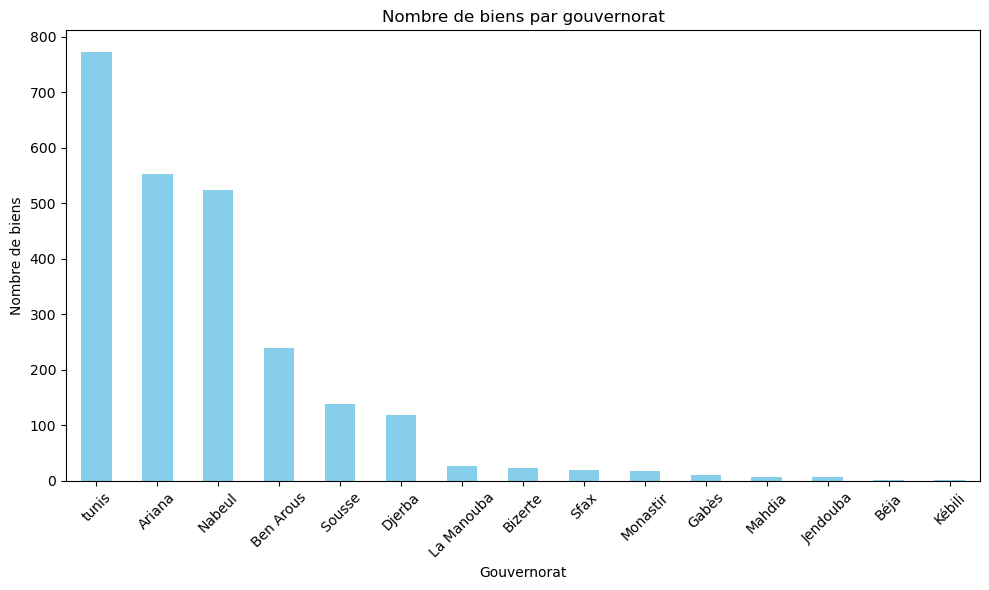

In [22]:
#affichage du nombre de biens par gouvernorat
df['gouvernorat'].value_counts().plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title("Nombre de biens par gouvernorat")
plt.xlabel("Gouvernorat")
plt.ylabel("Nombre de biens")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

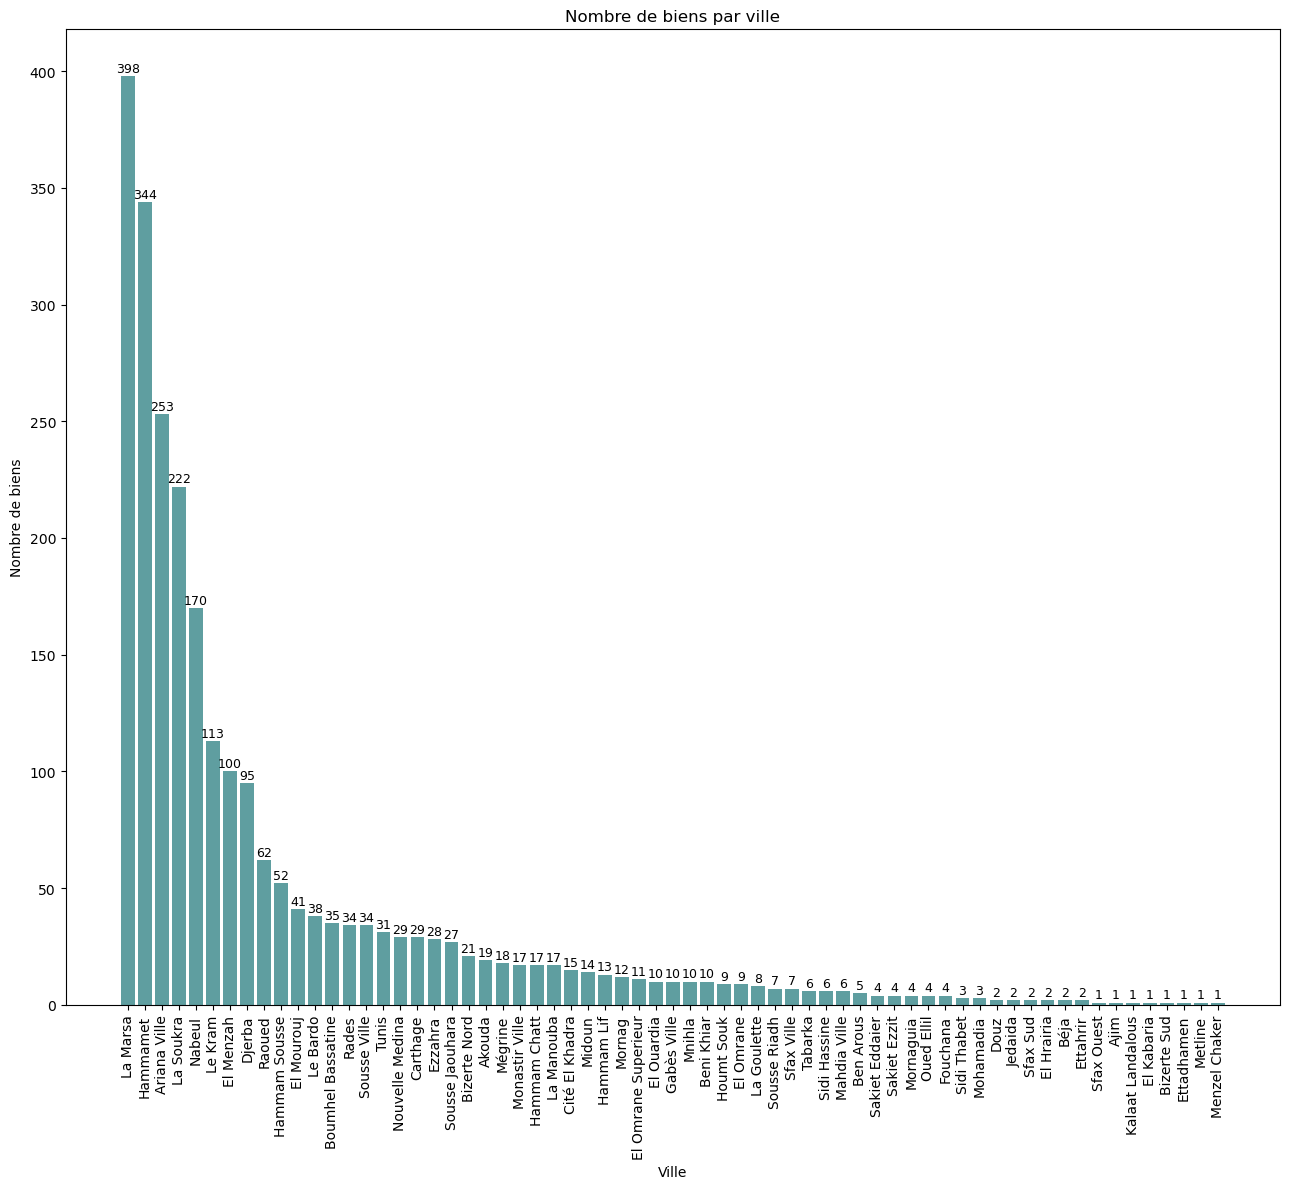

In [23]:
#affichage du nombre de biens par ville
nombre_biens=df['ville'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(13,12)) 
bars=plt.bar(nombre_biens.index, nombre_biens.values, color='cadetblue')
plt.title("Nombre de biens par ville")
plt.xlabel("Ville")
plt.ylabel("Nombre de biens")
plt.xticks(rotation=90)
plt.tight_layout()
for bar,count in zip(bars,nombre_biens.values):
    plt.text(bar.get_x()+bar.get_width()/2,bar.get_height()+0.5, 
             str(count),ha='center',va='bottom',fontsize=9,color='black')

plt.show()

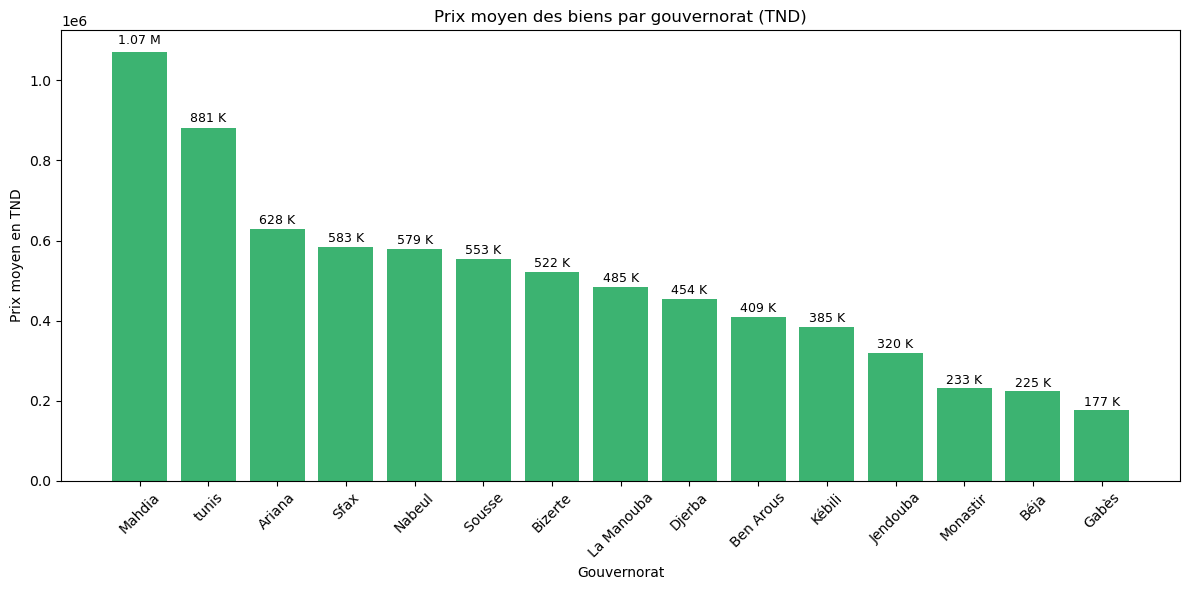

In [24]:
#affichage du prix moyen des biens par gouvernorat tnd
prix_moyen=df.groupby('gouvernorat')['prix_tnd'].mean().sort_values(ascending=False)
def affichage_simplifie_prix(val):
    if val>=1_000_000:
        return f"{val/1_000_000:.2f} M"
    elif val>=1_000:
        return f"{val/1_000:.0f} K"
    else:
        return str(val)
labels=prix_moyen.apply(affichage_simplifie_prix)
plt.figure(figsize=(12, 6))
bars=plt.bar(prix_moyen.index, prix_moyen.values, color='mediumseagreen')
plt.title("Prix moyen des biens par gouvernorat (TND)")
plt.xlabel("Gouvernorat")
plt.ylabel("Prix moyen en TND")
plt.xticks(rotation=45)
plt.tight_layout()
for bar, label in zip(bars, labels):
    yval = bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2,yval+yval*0.01,label,
             ha='center',va='bottom',fontsize=9,color='black')

plt.show()

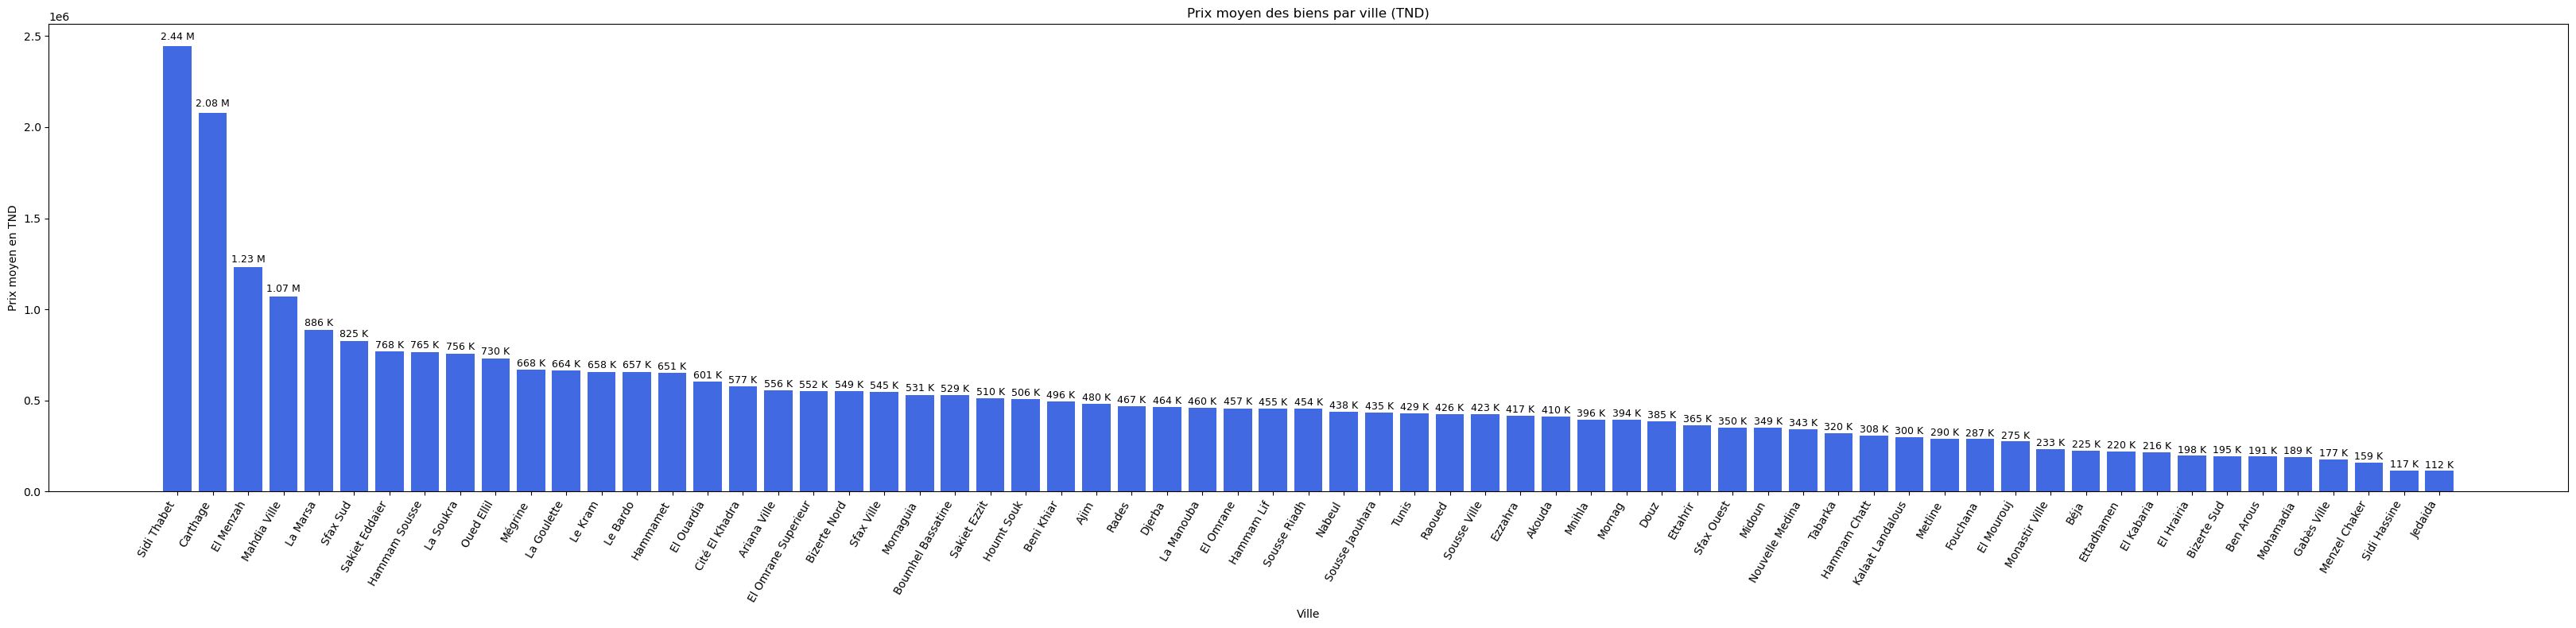

In [25]:
#affichage du prix moyen des biens par ville tnd
prix_moyen=df.groupby('ville')['prix_tnd'].mean().sort_values(ascending=False)
def affichage_simplifie_prix(val):
    if val>=1_000_000:
        return f"{val/1_000_000:.2f} M"
    elif val >= 1_000:
        return f"{val/1_000:.0f} K"
    else:
        return str(val)
labels=prix_moyen.apply(affichage_simplifie_prix)
plt.figure(figsize=(max(14,len(prix_moyen)*0.5),8))
bars=plt.bar(prix_moyen.index, prix_moyen.values, color='royalblue')
plt.title("Prix moyen des biens par ville (TND)")
plt.xlabel("Ville")
plt.ylabel("Prix moyen en TND")
plt.xticks(rotation=60,ha='right')
plt.tight_layout()
for bar,label in zip(bars, labels):
    yval=bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2,yval+yval*0.01,label,
             ha='center',va='bottom',fontsize=9,color='black')
plt.show()


[1. 2. 0.]
Taux des biens par état :
État 2.0 : 47.97%
État 1.0 : 44.22%
État 0.0 : 7.81%


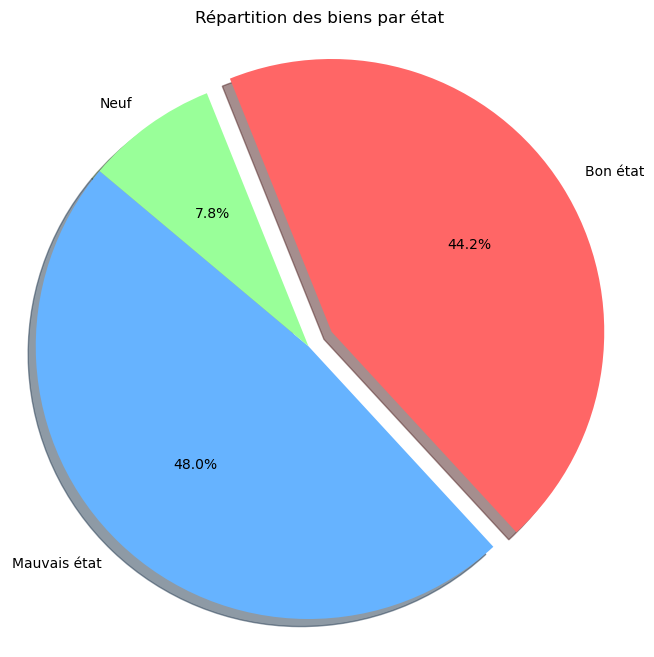

In [26]:
#affichage du taux des bien qui sont en bon état, avec: 0 -> état neuf, 1 -> bon état, 2 -> mauvais état
print(df['etat_du_bien'].unique())

nb_bien_etat=df['etat_du_bien'].value_counts()
etat_percentages=(nb_bien_etat/df.shape[0])*100
print("Taux des biens par état :")
for etat,count in nb_bien_etat.items():
    print(f"État {etat} : {etat_percentages[etat]:.2f}%")
etat_labels = {
    0:"Neuf",      
    1:"Bon état",  
    2:"Mauvais état"  
    }
labels=[etat_labels[etat] for etat in nb_bien_etat.index] 
sizes=etat_percentages.values
colors=['#66b3ff','#ff6666','#99ff99']
explode=(0, 0.1, 0)
plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True,startangle=140)
plt.title("Répartition des biens par état")
plt.axis('equal')
plt.show()

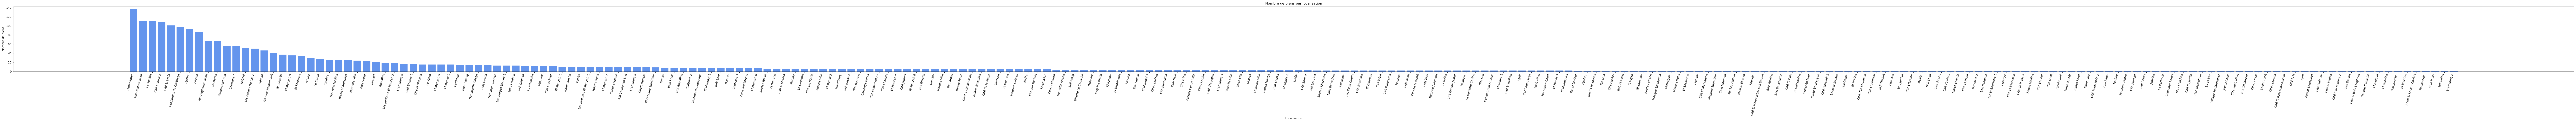

In [27]:
#affichage du nb des biens par ville
nb_biens = df['localisation'].value_counts()
plt.figure(figsize=(max(14, len(nb_biens) * 0.5), 6))
plt.bar(nb_biens.index, nb_biens.values, color='cornflowerblue')
plt.title("Nombre de biens par localisation")
plt.xlabel("Localisation")
plt.ylabel("Nombre de biens")
plt.xticks(rotation=75, ha='right')
plt.tight_layout()
plt.show()

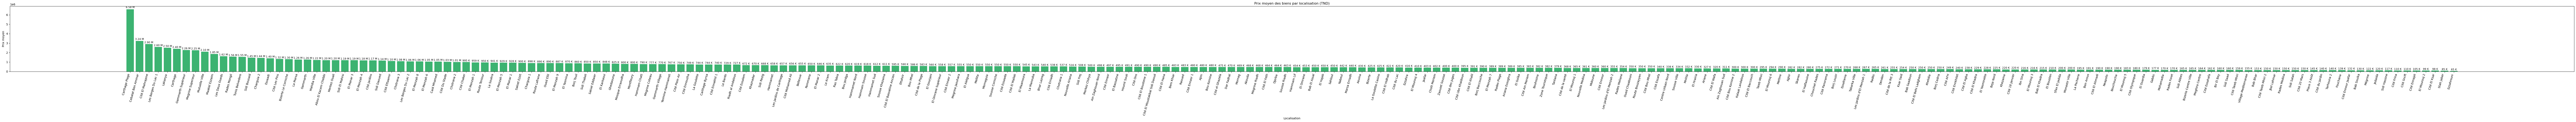

In [28]:
#affichage du prix moyen des biens par ville
prix_moyen = df.groupby('localisation')['prix_tnd'].mean().sort_values(ascending=False)
def simplifier(val):
    if val>=1_000_000:
        return f"{val/1_000_000:.2f} M"
    elif val>=1_000:
        return f"{val/1_000:.0f} K"
    else:
        return str(val)
labels=prix_moyen.apply(simplifier)
plt.figure(figsize=(max(14,len(prix_moyen)*0.5),6))
bars=plt.bar(prix_moyen.index, prix_moyen.values,color='mediumseagreen')
plt.title("Prix moyen des biens par localisation (TND)")
plt.xlabel("Localisation")
plt.ylabel("Prix moyen")
plt.xticks(rotation=75, ha='right')
plt.tight_layout()
for bar, label in zip(bars, labels):
    yval=bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + yval*0.01, label,
             ha='center', va='bottom', fontsize=9)
plt.show()


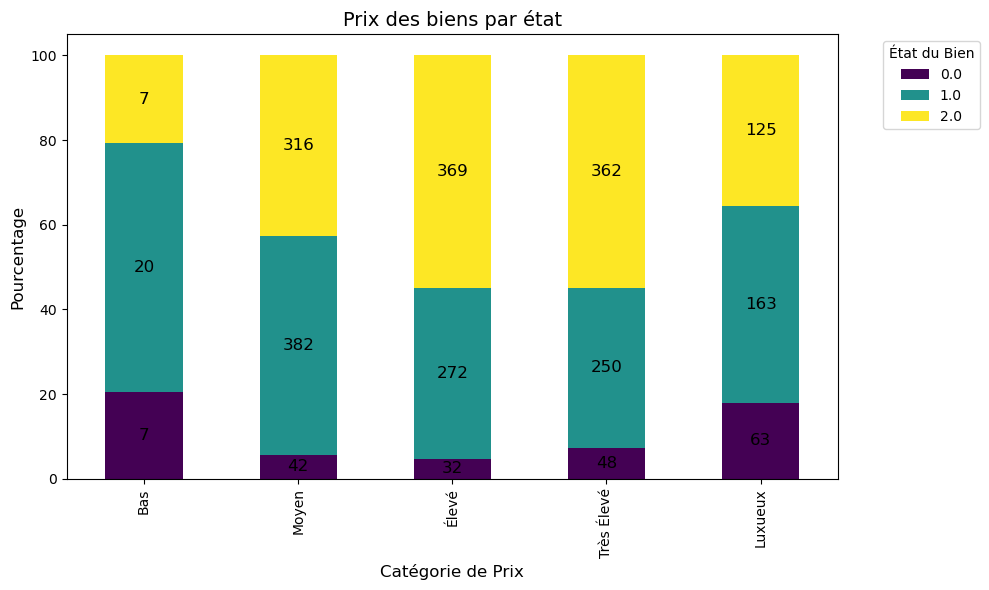

In [29]:
#affichage et catégorisation des prix des biens par état
bins = [0, 100000, 300000, 500000, 1000000, float('inf')]
labels = ['Bas', 'Moyen', 'Élevé', 'Très Élevé', 'Luxueux']
df['catégorie_prix'] = pd.cut(df['prix_tnd'], bins=bins, labels=labels)
etat_par_prix = df.groupby(['catégorie_prix', 'etat_du_bien']).size().unstack().fillna(0)
etat_par_prix_percentage = etat_par_prix.div(etat_par_prix.sum(axis=1), axis=0) * 100
ax = etat_par_prix_percentage.plot(kind='bar', stacked=True, figsize=(10, 6), cmap='viridis')
for i, cat in enumerate(etat_par_prix.index):
    y_offset = 0
    for etat in etat_par_prix.columns:
        value = etat_par_prix.loc[cat, etat]
        percent = etat_par_prix_percentage.loc[cat, etat]
        if value > 0:
            ax.text(i,y_offset+percent/2,f'{int(value)}',ha='center',va='center',color='black', fontsize=12)
            y_offset+=percent
plt.title("Prix des biens par état", fontsize=14)
plt.xlabel("Catégorie de Prix", fontsize=12)
plt.ylabel("Pourcentage", fontsize=12)
plt.legend(title="État du Bien", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

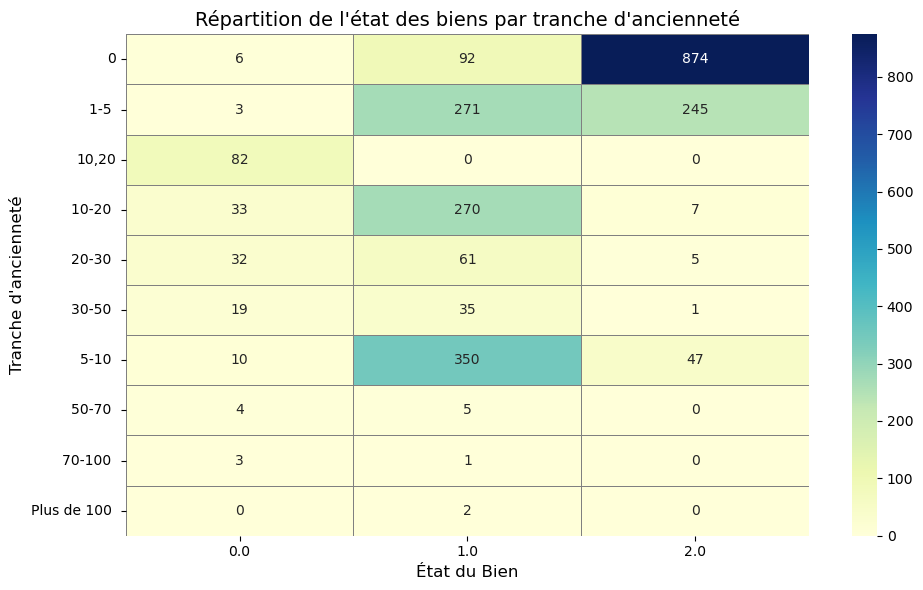

In [30]:
#affichage de la répartition de l'état des biens par tranche d'ancienneté
heatmap_data=df.groupby(['anciennete','etat_du_bien']).size().unstack().fillna(0)
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt='.0f', cmap='YlGnBu', linewidths=0.5, linecolor='gray')
plt.title("Répartition de l'état des biens par tranche d'ancienneté", fontsize=14)
plt.xlabel("État du Bien", fontsize=12)
plt.ylabel("Tranche d'ancienneté", fontsize=12)
plt.tight_layout()
plt.show()

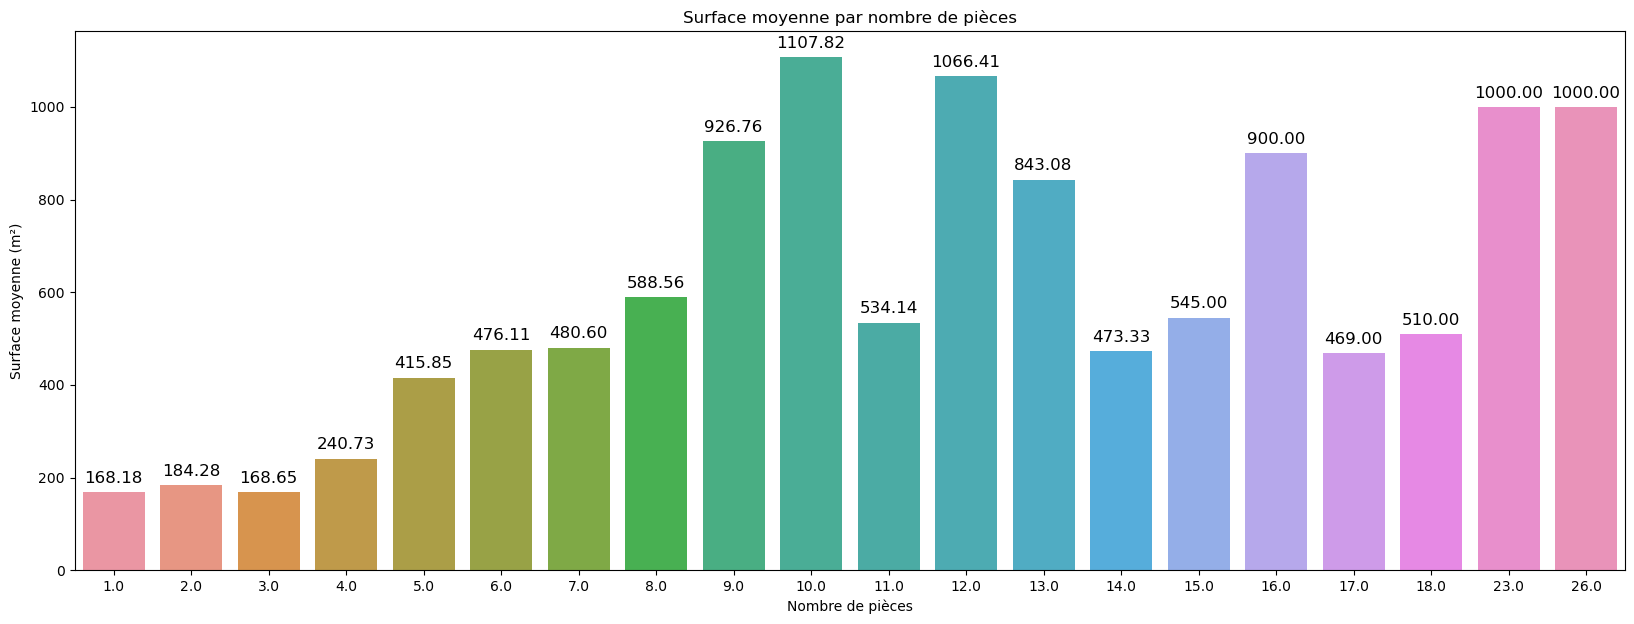

In [31]:
#affichage de la Surface moyenne par nombre de pièces
surface_moyenne_par_pieces = df.groupby('pieces')['superficie_m2'].mean().reset_index()
plt.figure(figsize=(20, 7)) 
ax = sns.barplot(data=surface_moyenne_par_pieces, x='pieces', y='superficie_m2')
plt.title("Surface moyenne par nombre de pièces")
plt.xlabel("Nombre de pièces")
plt.ylabel("Surface moyenne (m²)")
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10), textcoords='offset points')
plt.show()

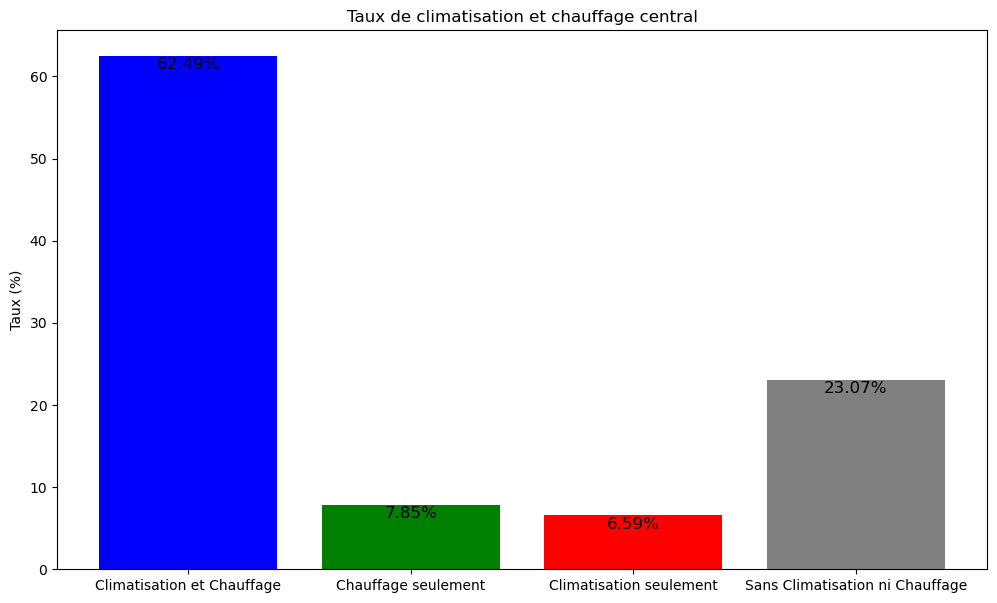

In [32]:
#affichage du taux de climatisation et chauffage central dans les biens
clim_et_chauffage = df[(df['climatisation'] == 'Oui') & (df['chauffage_central'] == 'Oui')].shape[0]
chauffage_seul = df[(df['climatisation'] == 'Non') & (df['chauffage_central'] == 'Oui')].shape[0]
climatisation_seule = df[(df['climatisation'] == 'Oui') & (df['chauffage_central'] == 'Non')].shape[0]
sans_chauffage_et_clim = df[(df['climatisation'] == 'Non') & (df['chauffage_central'] == 'Non')].shape[0]
total_biens = df.shape[0]
taux_clim_et_chauffage = clim_et_chauffage / total_biens * 100
taux_chauffage_seul = chauffage_seul / total_biens * 100
taux_climatisation_seule = climatisation_seule / total_biens * 100
taux_sans_chauffage_et_clim = sans_chauffage_et_clim / total_biens * 100
labels = ['Climatisation et Chauffage', 'Chauffage seulement', 'Climatisation seulement', 'Sans Climatisation ni Chauffage']
values = [taux_clim_et_chauffage, taux_chauffage_seul, taux_climatisation_seule, taux_sans_chauffage_et_clim]
plt.figure(figsize=(12, 7))  # Taille améliorée
bars = plt.bar(labels, values, color=['blue', 'green', 'red', 'gray'])
plt.title("Taux de climatisation et chauffage central")
plt.ylabel("Taux (%)")
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 2, f'{bar.get_height():.2f}%', 
             ha='center', va='bottom', fontsize=12, color='black')

plt.show()


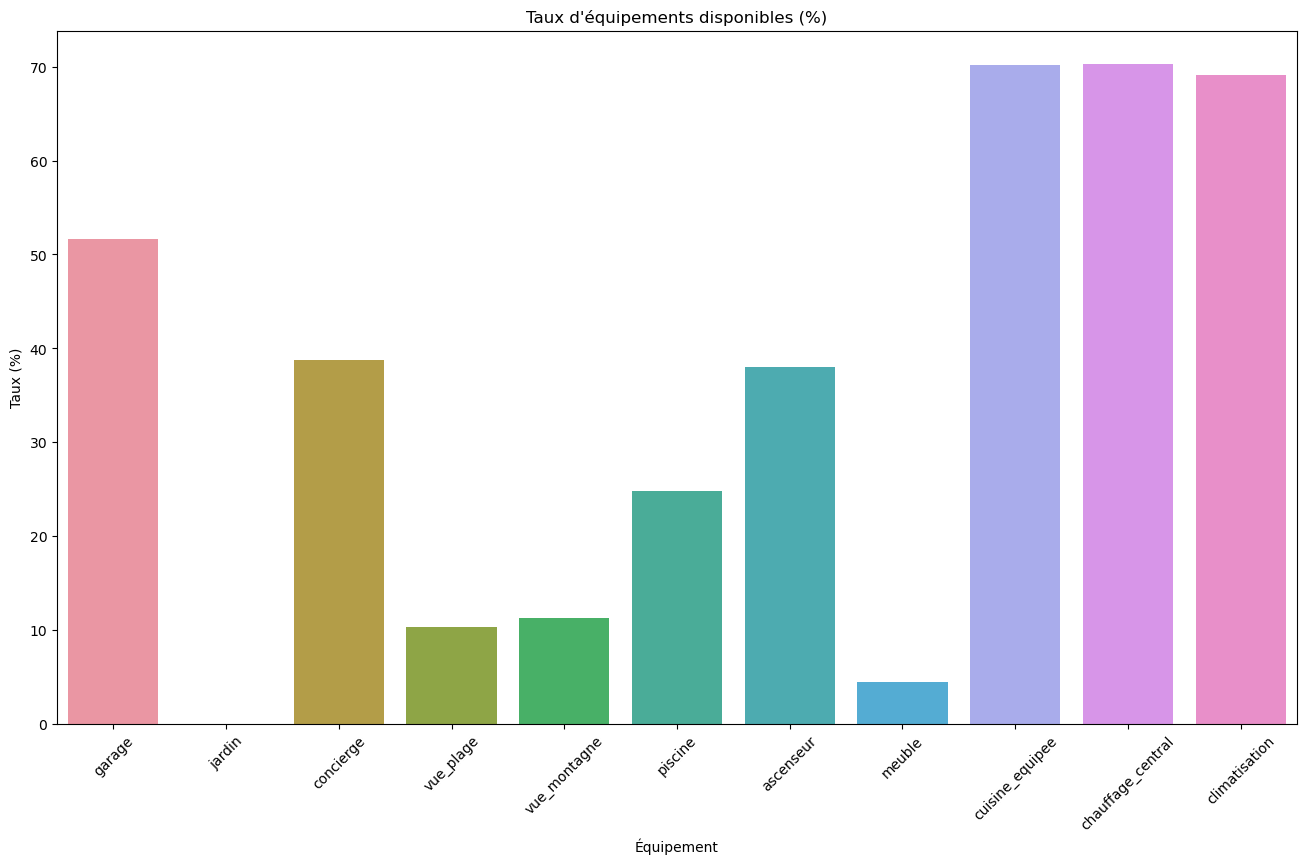

In [33]:
#affichage du taux d'équipements disponibles par biens
equipements = ['garage', 'jardin', 'concierge', 'vue_plage', 'vue_montagne', 
               'piscine', 'ascenseur', 'meuble', 'cuisine_equipee', 
               'chauffage_central', 'climatisation']
equipements_disponibles = df[equipements].apply(lambda x: (x == 'Oui').mean() * 100)
plt.figure(figsize=(16, 9))
sns.barplot(x=equipements_disponibles.index, y=equipements_disponibles.values)
plt.title("Taux d'équipements disponibles (%)")
plt.xlabel("Équipement")
plt.ylabel("Taux (%)")
plt.xticks(rotation=45)
plt.show()

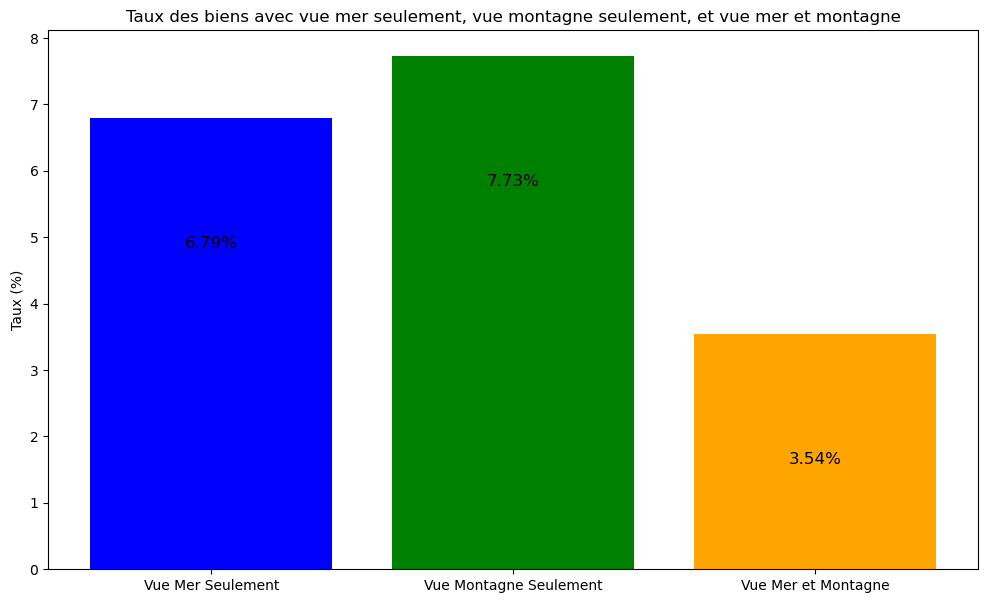

In [34]:
#affichage du taux des biens avec vues sur
vue_mer_seulement = df[(df['vue_plage'] == 'Oui') & (df['vue_montagne'] == 'Non')].shape[0]
vue_montagne_seulement = df[(df['vue_montagne'] == 'Oui') & (df['vue_plage'] == 'Non')].shape[0]
vue_mer_et_montagne = df[(df['vue_plage'] == 'Oui') & (df['vue_montagne'] == 'Oui')].shape[0]
total_biens = df.shape[0]
taux_vue_mer_seulement = vue_mer_seulement / total_biens * 100
taux_vue_montagne_seulement = vue_montagne_seulement / total_biens * 100
taux_vue_mer_et_montagne = vue_mer_et_montagne / total_biens * 100
labels = ['Vue Mer Seulement', 'Vue Montagne Seulement', 'Vue Mer et Montagne']
values = [taux_vue_mer_seulement, taux_vue_montagne_seulement, taux_vue_mer_et_montagne]
plt.figure(figsize=(12, 7))  # Taille améliorée
bars = plt.bar(labels, values, color=['blue', 'green', 'orange'])
plt.title("Taux des biens avec vue mer seulement, vue montagne seulement, et vue mer et montagne")
plt.ylabel("Taux (%)")
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 2, f'{bar.get_height():.2f}%', 
             ha='center', va='bottom', fontsize=12, color='black')

plt.show()

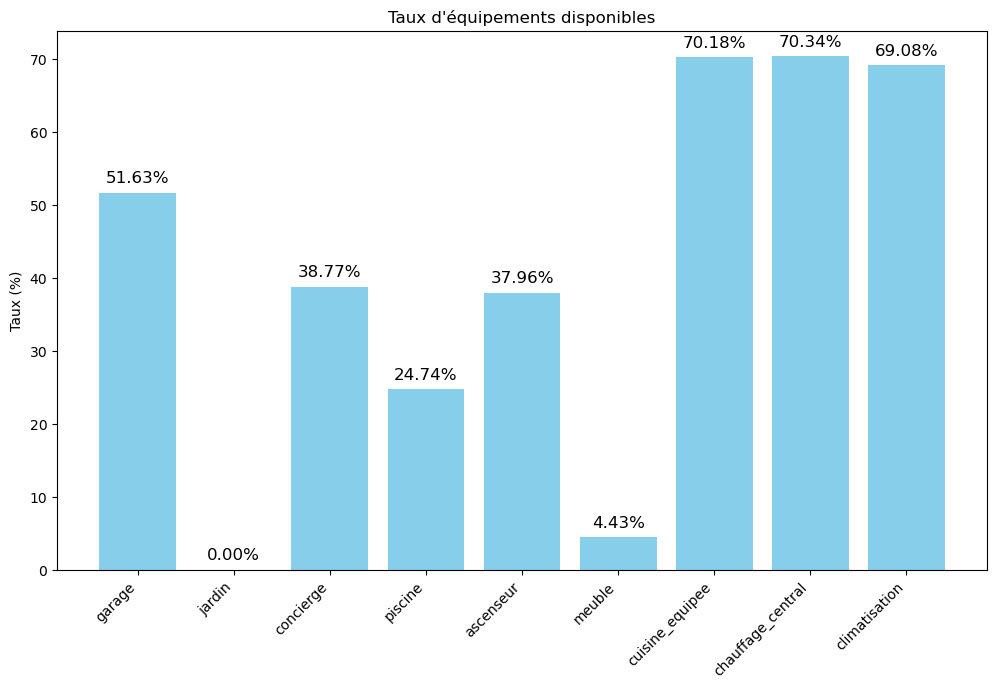

In [35]:
#affichage du taux d'équipements dispo par bien
equipements = ['garage', 'jardin', 'concierge','piscine', 'ascenseur', 'meuble', 'cuisine_equipee', 'chauffage_central', 'climatisation']
taux_equipements = [(df[eq] == 'Oui').sum() / total_biens * 100 for eq in equipements]
plt.figure(figsize=(12, 7))
plt.bar(equipements, taux_equipements, color='skyblue')
plt.title("Taux d'équipements disponibles")
plt.ylabel("Taux (%)")
plt.xticks(rotation=45, ha='right')
for i, bar in enumerate(plt.bar(equipements, taux_equipements, color='skyblue')):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, f'{bar.get_height():.2f}%', ha='center', va='bottom', fontsize=12, color='black')
plt.show()


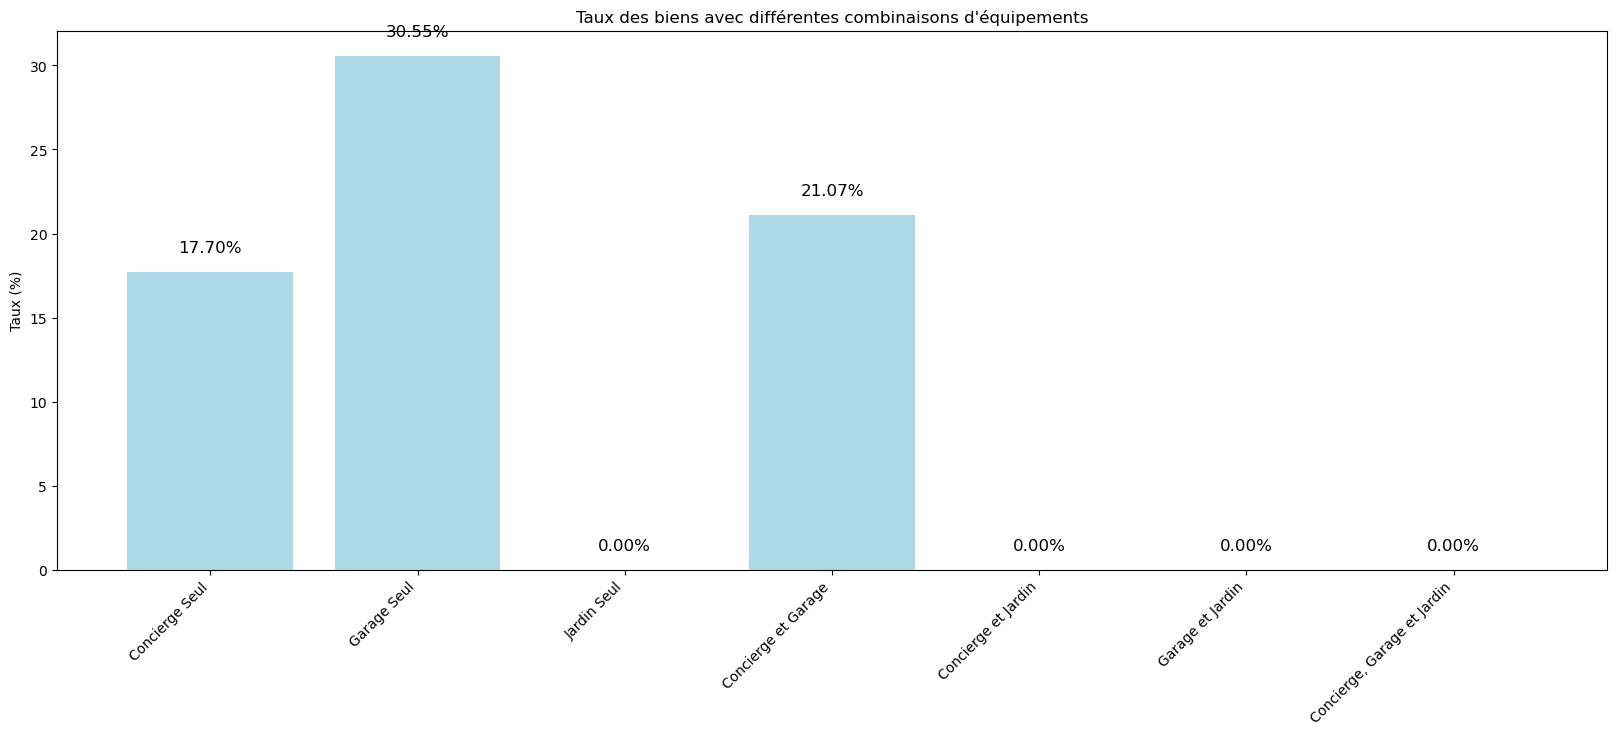

In [36]:
#affichage du taux des biens avec différentes combinaisons d'équipements
concierge_seul = df[(df['concierge'] == 'Oui') & (df['garage'] == 'Non') & (df['jardin'] == 'Non')].shape[0]
garage_seul = df[(df['garage'] == 'Oui') & (df['concierge'] == 'Non') & (df['jardin'] == 'Non')].shape[0]
jardin_seul = df[(df['jardin'] == 'Oui') & (df['concierge'] == 'Non') & (df['garage'] == 'Non')].shape[0]
concierge_et_garage = df[(df['concierge'] == 'Oui') & (df['garage'] == 'Oui') & (df['jardin'] == 'Non')].shape[0]
concierge_et_jardin = df[(df['concierge'] == 'Oui') & (df['jardin'] == 'Oui') & (df['garage'] == 'Non')].shape[0]
garage_et_jardin = df[(df['garage'] == 'Oui') & (df['jardin'] == 'Oui') & (df['concierge'] == 'Non')].shape[0]
concierge_garage_et_jardin = df[(df['concierge'] == 'Oui') & (df['garage'] == 'Oui') & (df['jardin'] == 'Oui')].shape[0]
total_biens = df.shape[0]
taux_concierge_seul = concierge_seul / total_biens * 100
taux_garage_seul = garage_seul / total_biens * 100
taux_jardin_seul = jardin_seul / total_biens * 100
taux_concierge_et_garage = concierge_et_garage / total_biens * 100
taux_concierge_et_jardin = concierge_et_jardin / total_biens * 100
taux_garage_et_jardin = garage_et_jardin / total_biens * 100
taux_concierge_garage_et_jardin = concierge_garage_et_jardin / total_biens * 100
labels = ['Concierge Seul', 'Garage Seul', 'Jardin Seul', 'Concierge et Garage', 'Concierge et Jardin', 'Garage et Jardin', 'Concierge, Garage et Jardin']
values = [taux_concierge_seul, taux_garage_seul, taux_jardin_seul, taux_concierge_et_garage, taux_concierge_et_jardin, taux_garage_et_jardin, taux_concierge_garage_et_jardin]
plt.figure(figsize=(20, 7))
bars = plt.bar(labels, values, color='lightblue')
plt.title("Taux des biens avec différentes combinaisons d'équipements")
plt.ylabel("Taux (%)")
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, f'{bar.get_height():.2f}%', ha='center', va='bottom', fontsize=12, color='black')
plt.xticks(rotation=45, ha='right')
plt.show()


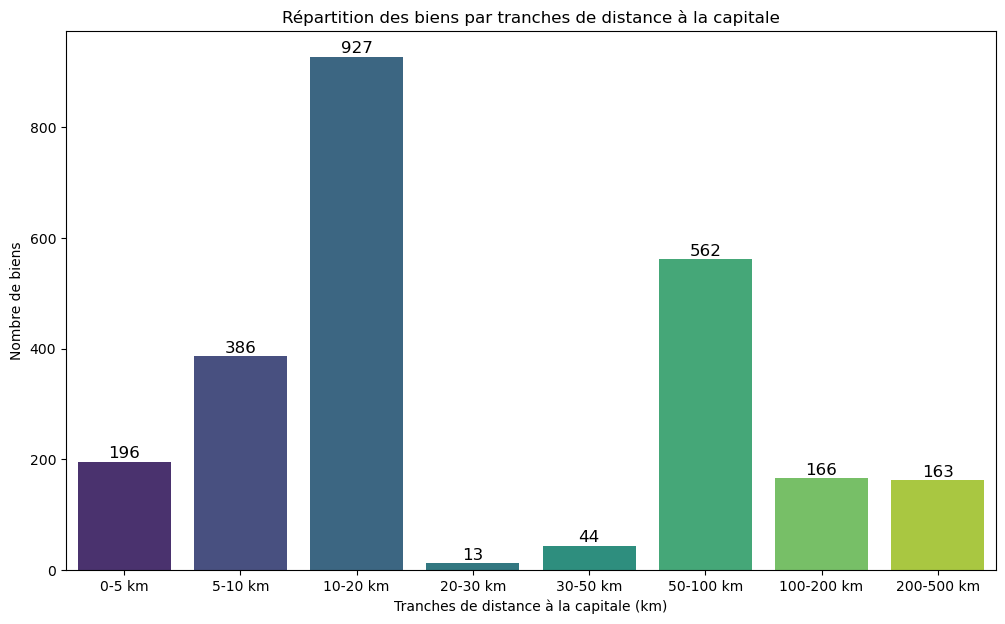

In [37]:
#affichage de la répartition des biens par tranches de distance à la capitale
bins = [0, 5, 10, 20, 30, 50, 100, 200, 500]
labels = ['0-5 km', '5-10 km', '10-20 km', '20-30 km', '30-50 km', '50-100 km', '100-200 km', '200-500 km']
distance_tranche = pd.cut(df['distance_capitale_km'], bins=bins, labels=labels, right=False)
distance_counts = distance_tranche.value_counts(sort=False)
plt.figure(figsize=(12, 7))
sns.barplot(x=distance_counts.index, y=distance_counts.values, palette='viridis')
plt.title("Répartition des biens par tranches de distance à la capitale")
plt.xlabel("Tranches de distance à la capitale (km)")
plt.ylabel("Nombre de biens")
for i, v in enumerate(distance_counts.values):
    plt.text(i, v + 1, str(v), ha='center', va='bottom', fontsize=12, color='black')

plt.show()

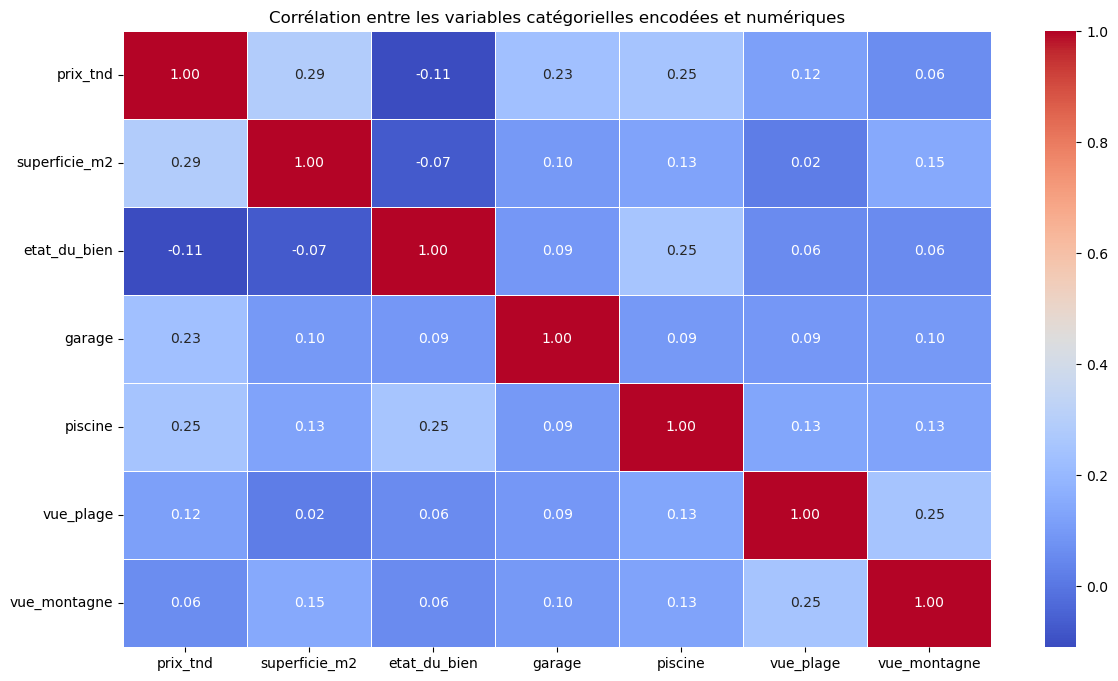

In [38]:
#Corrélation entre les variables catégorielles encodées et numériques
le = LabelEncoder()
etat_du_bien_num = le.fit_transform(df['etat_du_bien'])
garage_num = le.fit_transform(df['garage'])
piscine_num = le.fit_transform(df['piscine'])
vue_plage_num = le.fit_transform(df['vue_plage'])
vue_montagne_num = le.fit_transform(df['vue_montagne'])
temp_df = pd.DataFrame({
    'prix_tnd': df['prix_tnd'],
    'superficie_m2': df['superficie_m2'],
    'etat_du_bien': etat_du_bien_num,
    'garage': garage_num,
    'piscine': piscine_num,
    'vue_plage': vue_plage_num,
    'vue_montagne': vue_montagne_num
})
corr_matrix_cat = temp_df.corr()
plt.figure(figsize=(14, 8))
sns.heatmap(corr_matrix_cat, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Corrélation entre les variables catégorielles encodées et numériques")
plt.show()

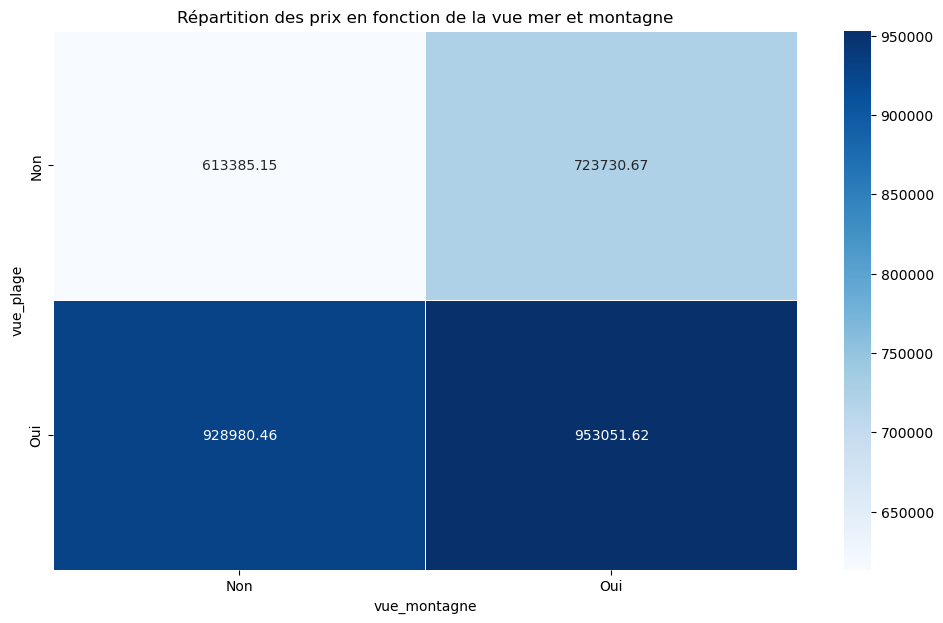

In [39]:
# Création d'une matrice croisée entre vue et prix
pivot_view = df.pivot_table(values='prix_tnd', index='vue_plage', columns='vue_montagne', aggfunc='mean')
plt.figure(figsize=(12, 7))
sns.heatmap(pivot_view, annot=True, cmap='Blues', fmt='.2f', linewidths=0.5)
plt.title("Répartition des prix en fonction de la vue mer et montagne")
plt.show()


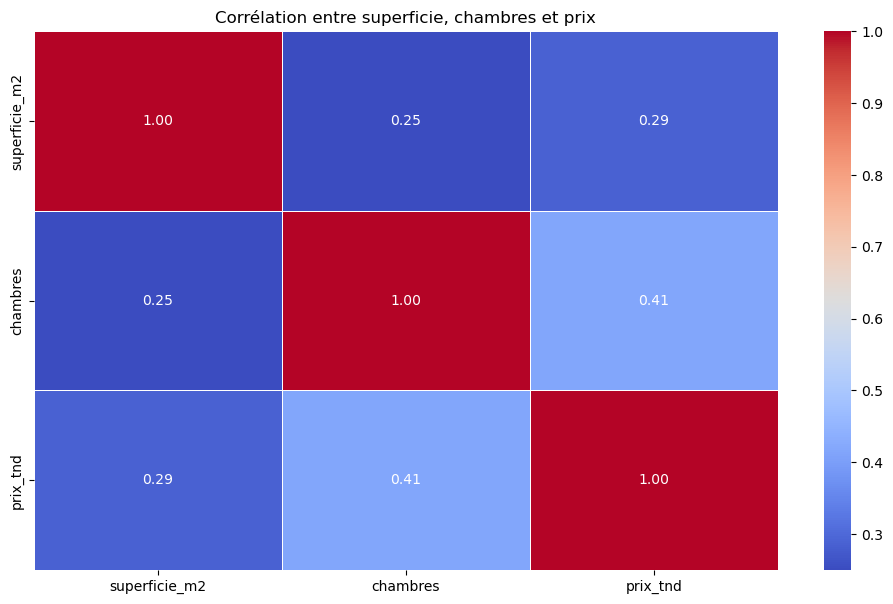

In [40]:
#Corrélation entre superficie, chambres et prix
df_numeric = df[['superficie_m2', 'chambres', 'prix_tnd']]
corr_matrix_size_price = df_numeric.corr()
plt.figure(figsize=(12, 7))
sns.heatmap(corr_matrix_size_price, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Corrélation entre superficie, chambres et prix")
plt.show()


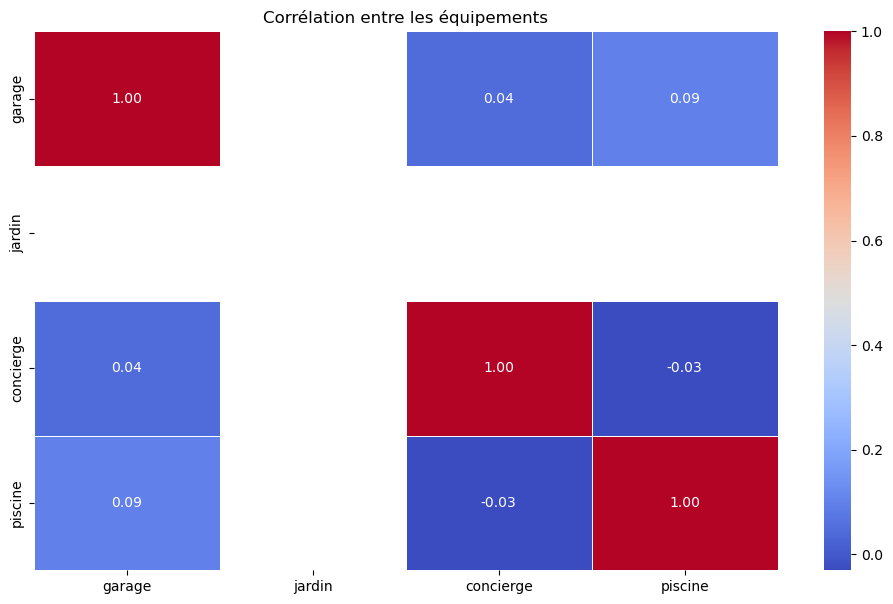

In [41]:
#Corrélation entre les équipements
garage_encoded = df['garage'].map({'Oui': 1, 'Non': 0})
jardin_encoded = df['jardin'].map({'Oui': 1, 'Non': 0})
concierge_encoded = df['concierge'].map({'Oui': 1, 'Non': 0})
piscine_encoded = df['piscine'].map({'Oui': 1, 'Non': 0})
equipments_df = pd.DataFrame({
    'garage': garage_encoded,
    'jardin': jardin_encoded,
    'concierge': concierge_encoded,
    'piscine': piscine_encoded
})
corr_matrix_equipments = equipments_df.corr()
plt.figure(figsize=(12, 7))
sns.heatmap(corr_matrix_equipments, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Corrélation entre les équipements")
plt.show()

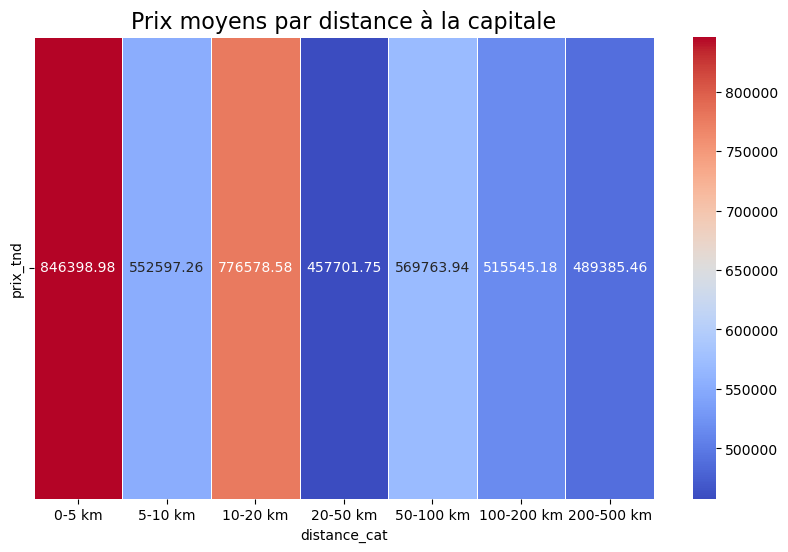

In [42]:
#affichage du prix moyens par distance à la capitale
bins = [0, 5, 10, 20, 50, 100, 200, 500]
labels = ['0-5 km', '5-10 km', '10-20 km', '20-50 km', '50-100 km', '100-200 km', '200-500 km']
distance_cat_temp = pd.cut(df['distance_capitale_km'], bins=bins, labels=labels)
pivot_distance_prix = df.assign(distance_cat=distance_cat_temp).pivot_table(
    values='prix_tnd', index='distance_cat', aggfunc='mean'
)
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_distance_prix.T, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Prix moyens par distance à la capitale", fontsize=16)
plt.show()


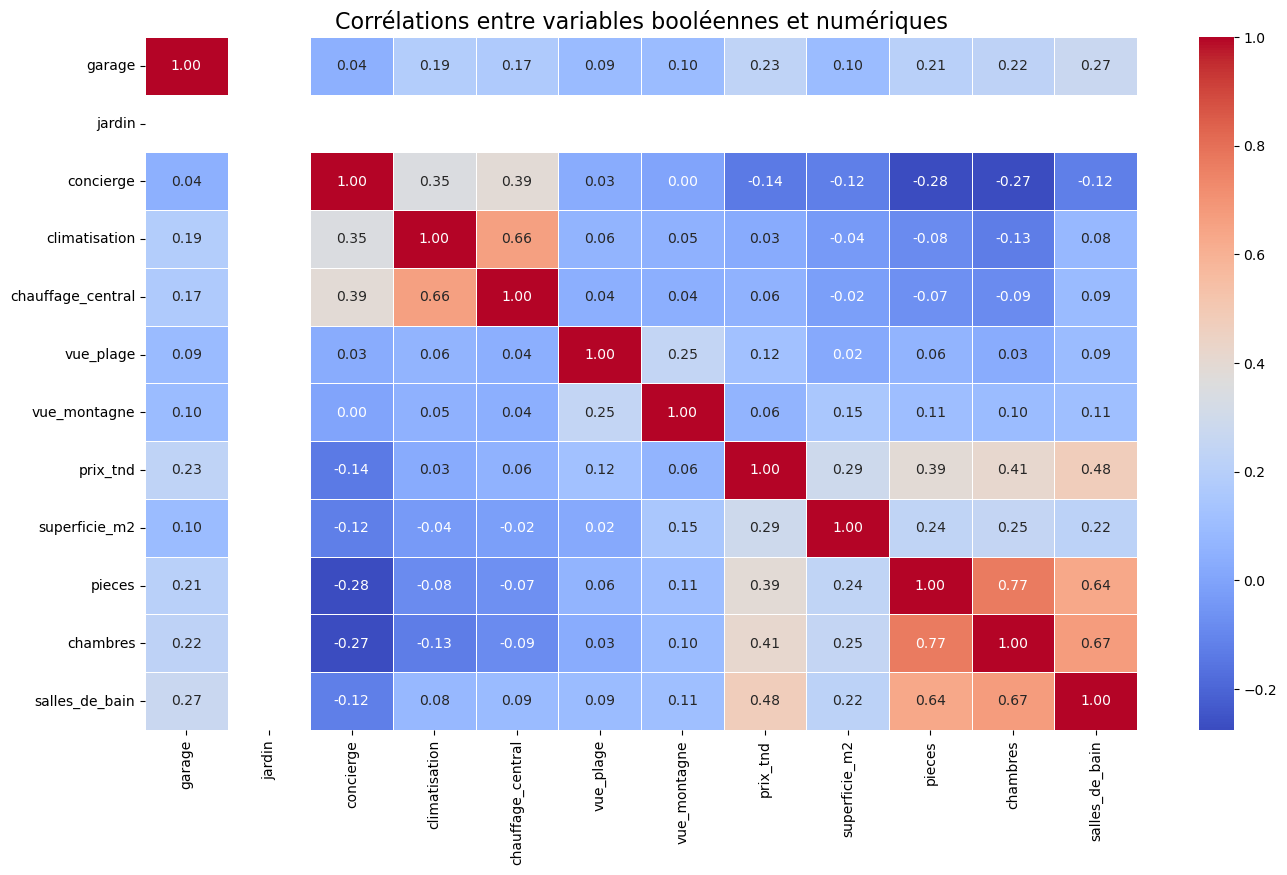

In [43]:
#affichage des corrélations entre variables booléennes et numériques
df['garage'] = df['garage'].map({'Oui': 1, 'Non': 0})
df['jardin'] = df['jardin'].map({'Oui': 1, 'Non': 0})
df['concierge'] = df['concierge'].map({'Oui': 1, 'Non': 0})
df['climatisation'] = df['climatisation'].map({'Oui': 1, 'Non': 0})
df['chauffage_central'] = df['chauffage_central'].map({'Oui': 1, 'Non': 0})
df['vue_plage'] = df['vue_plage'].map({'Oui': 1, 'Non': 0})
df['vue_montagne'] = df['vue_montagne'].map({'Oui': 1, 'Non': 0})
bool_columns = ['garage', 'jardin', 'concierge', 'climatisation', 'chauffage_central', 'vue_plage', 'vue_montagne']
num_columns = ['prix_tnd', 'superficie_m2', 'pieces', 'chambres', 'salles_de_bain']
corr_bool_num = df[bool_columns + num_columns].corr()
plt.figure(figsize=(16, 9))
sns.heatmap(corr_bool_num, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Corrélations entre variables booléennes et numériques", fontsize=16)
plt.show()


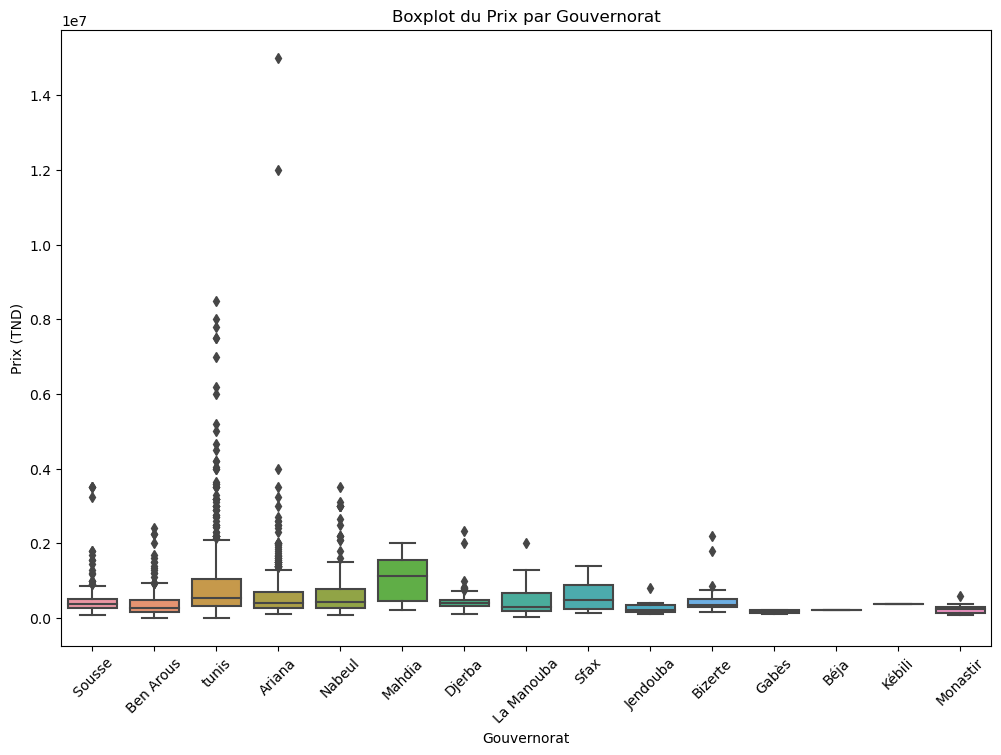

In [44]:
# Création du boxplot pour 'prix_tnd' par 'gouvernorat'
plt.figure(figsize=(12, 8))
sns.boxplot(x='gouvernorat', y='prix_tnd', data=df)
plt.title('Boxplot du Prix par Gouvernorat')
plt.xlabel('Gouvernorat')
plt.ylabel('Prix (TND)')
plt.xticks(rotation=45)
plt.show()


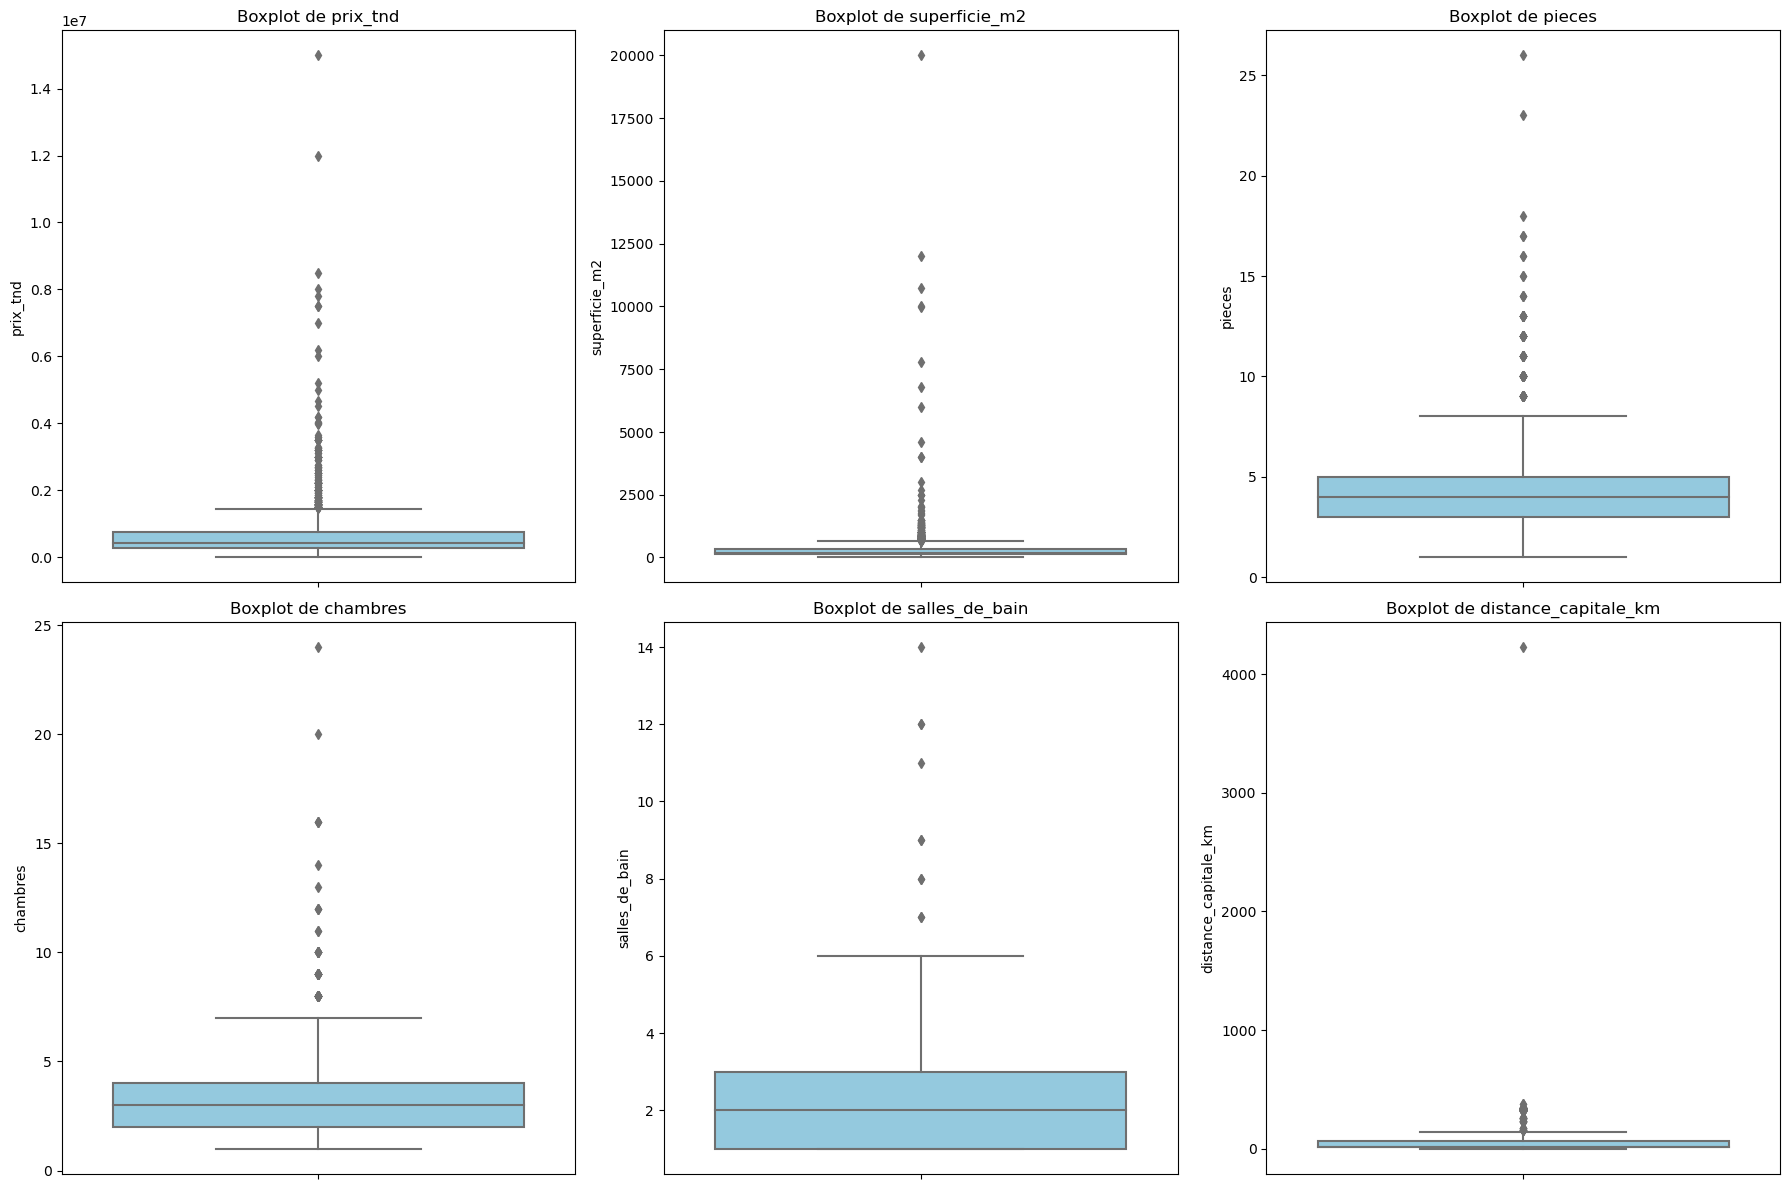

In [45]:
#affichage des boxplots 
num_cols=['prix_tnd','superficie_m2','pieces','chambres','salles_de_bain','distance_capitale_km']
plt.figure(figsize=(18, 12))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2,3,i)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()


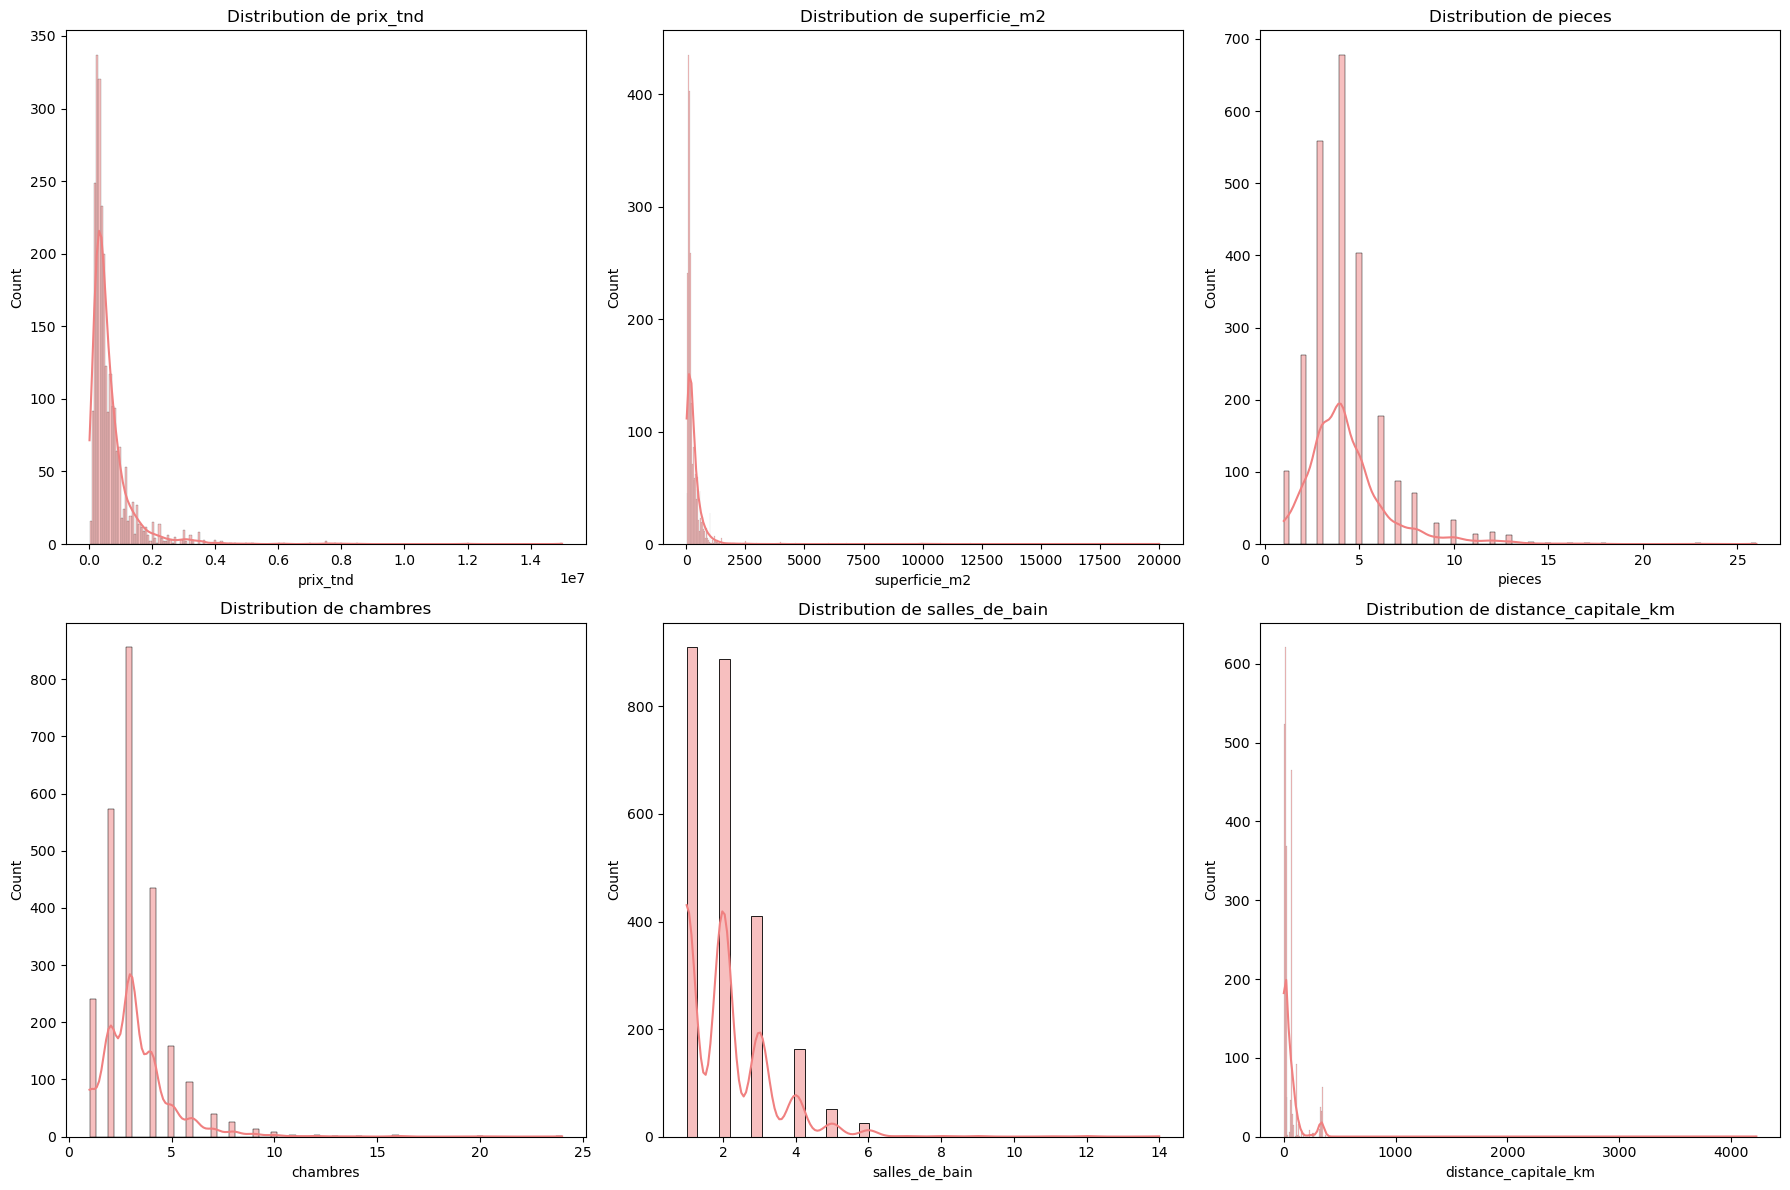

In [46]:
#affichage des distributions
plt.figure(figsize=(18, 12))
for i,col in enumerate(num_cols,1):
    plt.subplot(2,3,i)
    sns.histplot(df[col],kde=True,color='lightcoral')
    plt.title(f'Distribution de {col}')
plt.tight_layout()
plt.show()


In [47]:
Q1=df['prix_tnd'].quantile(0.25)
Q3=df['prix_tnd'].quantile(0.75)
IQR=Q3-Q1
df=df[(df['prix_tnd']>=Q1-1.5*IQR)&(df['prix_tnd']<=Q3+1.5*IQR)]


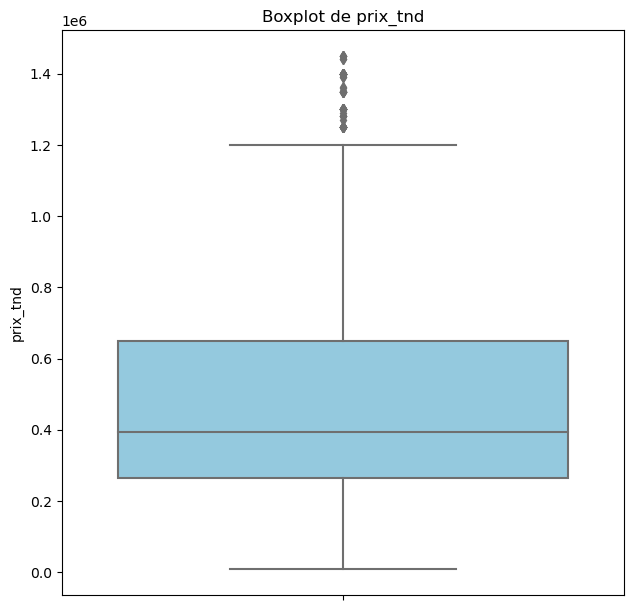

In [48]:
num_cols=['prix_tnd']
plt.figure(figsize=(18, 12))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2,3,i)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()


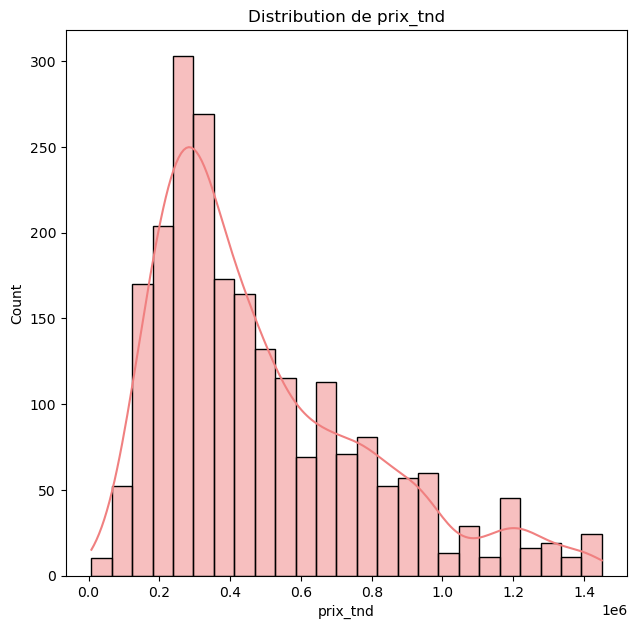

In [49]:
#affichage du prix sans les outliers
plt.figure(figsize=(18, 12))
for i,col in enumerate(num_cols,1):
    plt.subplot(2,3,i)
    sns.histplot(df[col],kde=True,color='lightcoral')
    plt.title(f'Distribution de {col}')
plt.tight_layout()
plt.show()


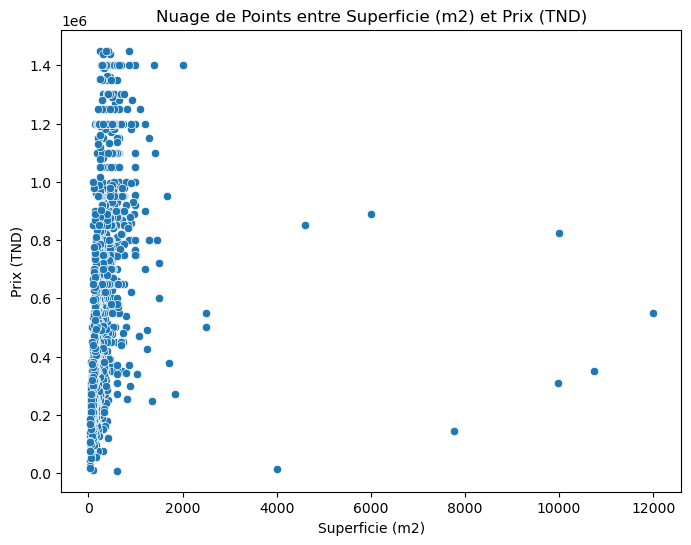

Coefficient de corrélation de Pearson entre Superficie (m2) et Prix (TND): 0.2264


In [50]:
#affichage du coefficient de corrélation de Pearson entre Superficie (m2) et Prix (TND)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='superficie_m2', y='prix_tnd')
plt.title('Nuage de Points entre Superficie (m2) et Prix (TND)')
plt.xlabel('Superficie (m2)')
plt.ylabel('Prix (TND)')
plt.show()
correlation = df['superficie_m2'].corr(df['prix_tnd'])
print(f"Coefficient de corrélation de Pearson entre Superficie (m2) et Prix (TND): {correlation:.4f}")


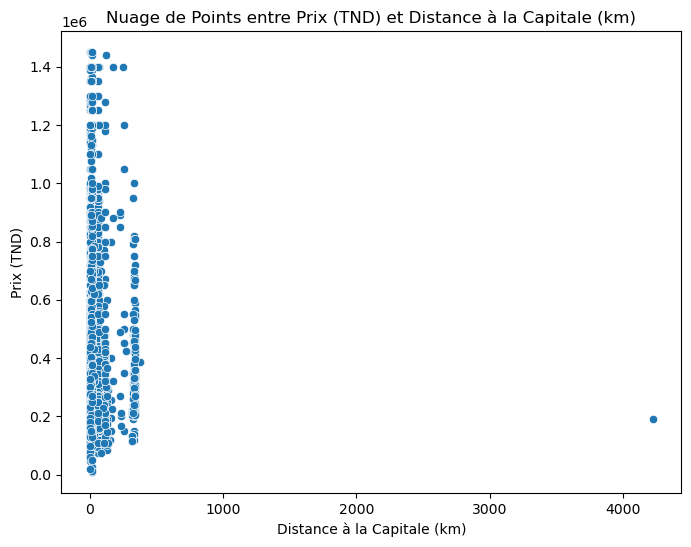

Coefficient de corrélation entre Prix (TND) et Distance à la Capitale (km): -0.0679


In [51]:
#affichage du Coefficient de corrélation entre Prix (TND) et Distance à la Capitale (km)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='distance_capitale_km', y='prix_tnd')
plt.title('Nuage de Points entre Prix (TND) et Distance à la Capitale (km)')
plt.xlabel('Distance à la Capitale (km)')
plt.ylabel('Prix (TND)')
plt.show()
correlation_distance = df['distance_capitale_km'].corr(df['prix_tnd'])
print(f"Coefficient de corrélation entre Prix (TND) et Distance à la Capitale (km): {correlation_distance:.4f}")


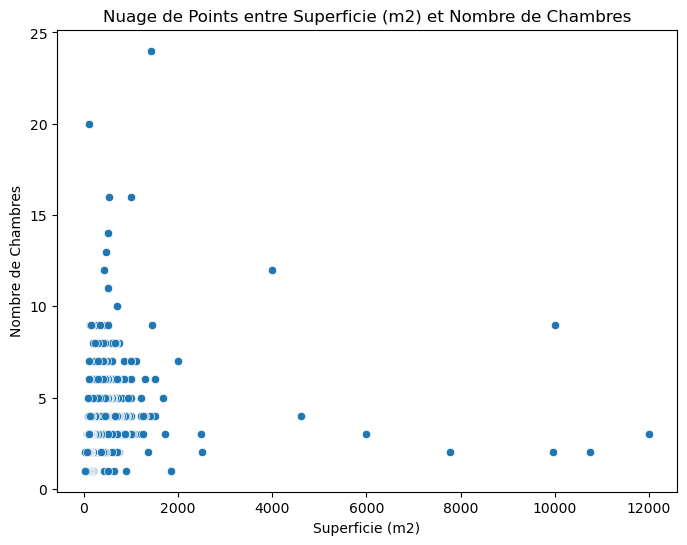

Coefficient de corrélation entre Superficie (m2) et Nombre de Chambres: 0.2225


In [52]:
#affichage du Coefficient de corrélation entre Superficie (m2) et Nombre de Chambres:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='superficie_m2', y='chambres')
plt.title('Nuage de Points entre Superficie (m2) et Nombre de Chambres')
plt.xlabel('Superficie (m2)')
plt.ylabel('Nombre de Chambres')
plt.show()
correlation_chambres = df['superficie_m2'].corr(df['chambres'])
print(f"Coefficient de corrélation entre Superficie (m2) et Nombre de Chambres: {correlation_chambres:.4f}")


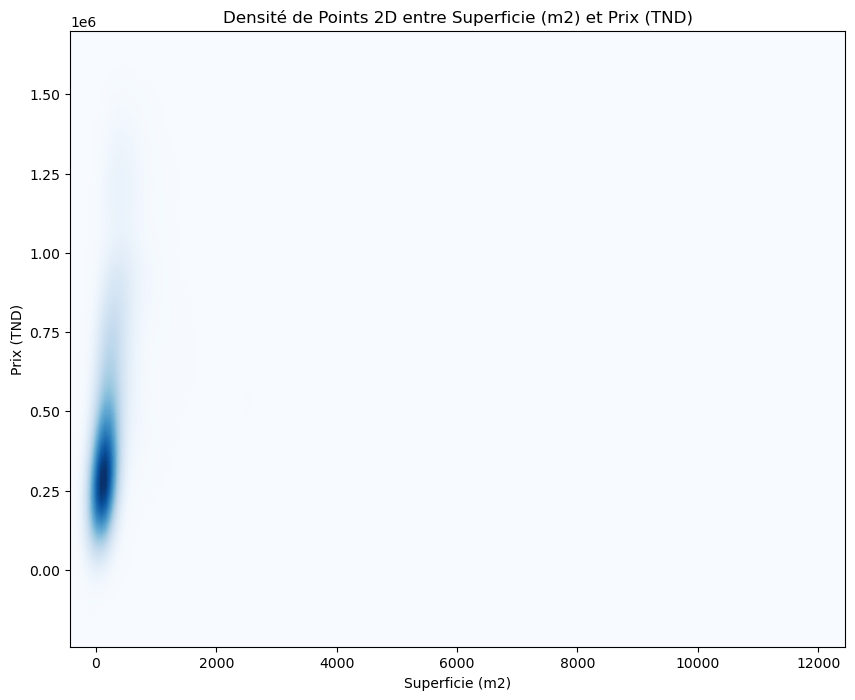

In [53]:
#affichage de la densité des points entre superficie et prix en tnd
plt.figure(figsize=(10, 8))
sns.kdeplot(x=df['superficie_m2'], y=df['prix_tnd'], cmap="Blues", fill=True, thresh=0, levels=100)
plt.title('Densité de Points 2D entre Superficie (m2) et Prix (TND)')
plt.xlabel('Superficie (m2)')
plt.ylabel('Prix (TND)')
plt.show()

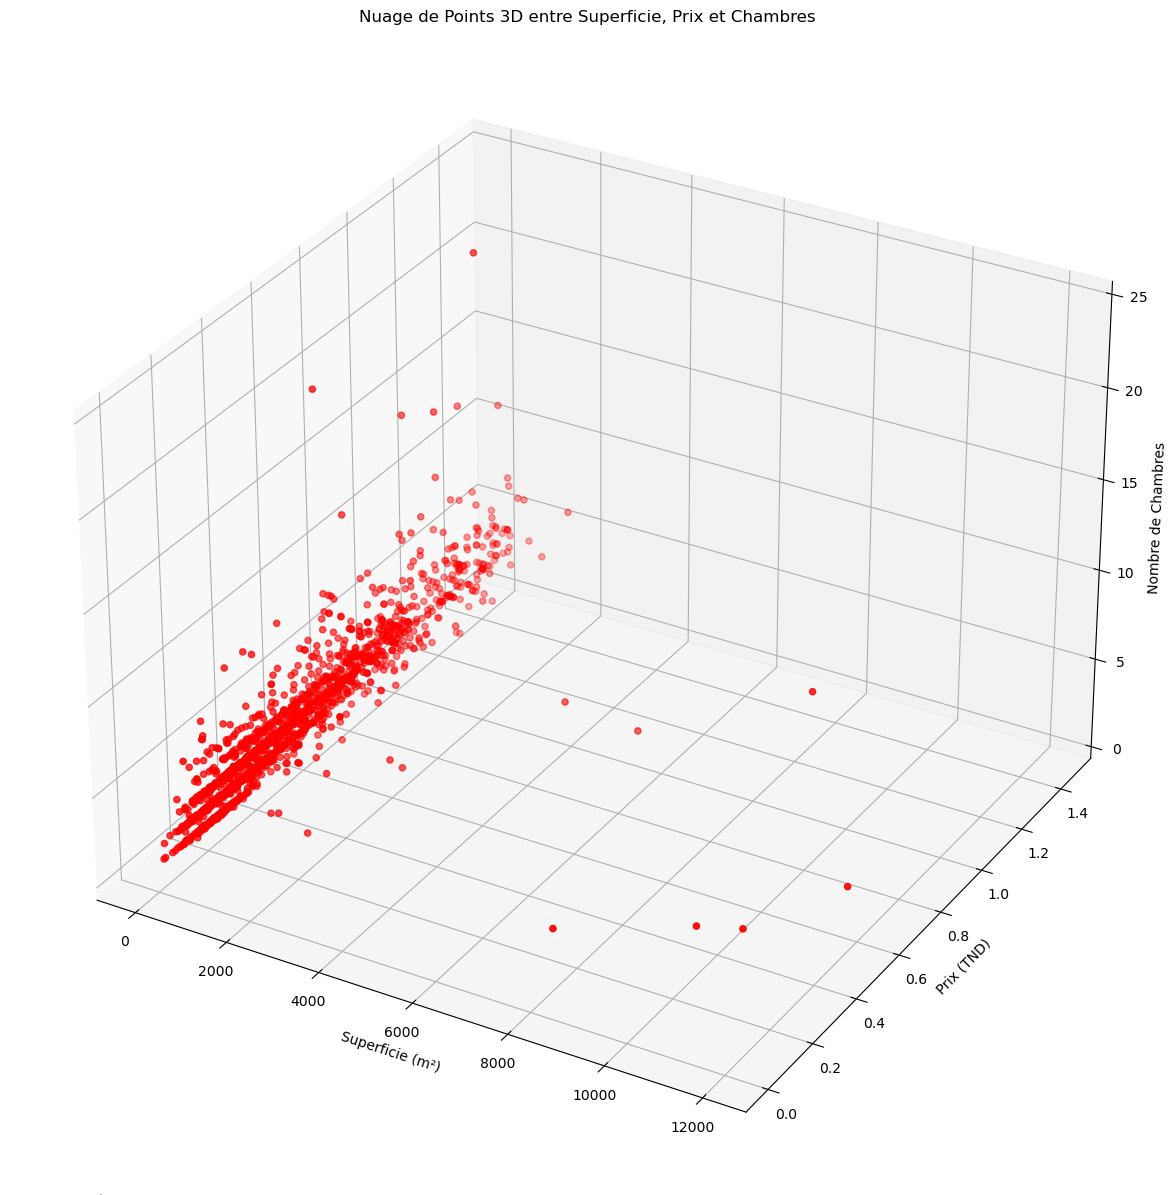

In [54]:
#Nuage de Points 3D entre Superficie, Prix et Chambres
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['superficie_m2'], df['prix_tnd'], df['chambres'], c='r', marker='o')
ax.set_xlabel('Superficie (m²)')
ax.set_ylabel('Prix (TND)')
ax.set_zlabel('Nombre de Chambres')
ax.set_title('Nuage de Points 3D entre Superficie, Prix et Chambres')
plt.show()

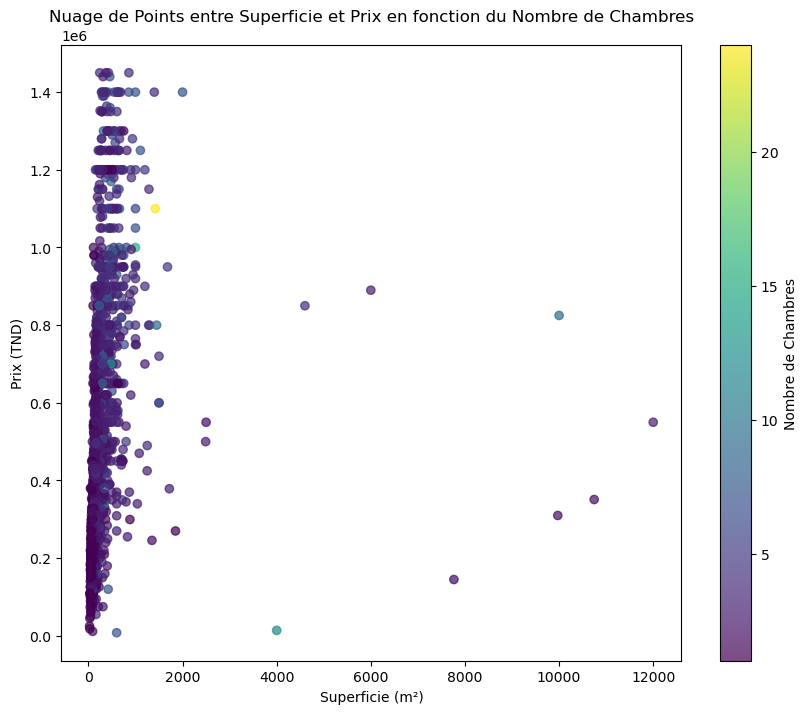

In [55]:
# Création du nuage de points avec couleurs (colorbar pour 'chambres')
plt.figure(figsize=(10, 8))
scatter = plt.scatter(df['superficie_m2'], df['prix_tnd'], c=df['chambres'], cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Nombre de Chambres')
plt.title('Nuage de Points entre Superficie et Prix en fonction du Nombre de Chambres')
plt.xlabel('Superficie (m²)')
plt.ylabel('Prix (TND)')
plt.show()


In [56]:
#Prédiction des prix en fonction des colonnes catégorielles
label_encoder = LabelEncoder()
categorical_cols = ['garage', 'jardin', 'concierge', 'vue_plage', 'vue_montagne', 'piscine', 'ascenseur', 'meuble', 'cuisine_equipee', 'chauffage_central', 'climatisation']
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])
X = df[['superficie_m2', 'chambres', 'salles_de_bain', 'distance_capitale_km', 
        'garage', 'jardin', 'concierge', 'vue_plage', 'vue_montagne', 'piscine', 
        'ascenseur', 'meuble', 'cuisine_equipee', 'chauffage_central', 'climatisation']]
y = df['prix_tnd']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [57]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R²: {r2}")

Mean Squared Error: 46352966956.03456
R²: 0.47761456413727854


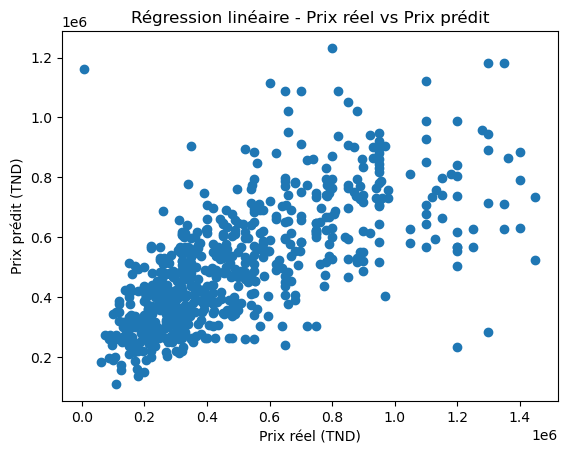

In [58]:
plt.scatter(y_test, y_pred)
plt.xlabel('Prix réel (TND)')
plt.ylabel('Prix prédit (TND)')
plt.title('Régression linéaire - Prix réel vs Prix prédit')
plt.show()


In [59]:
#cacluler et classifier selon le rappoet qualité prix
df['note_qualite'] = (
    df['superficie_m2'] * 0.3 +
    df['chambres'] * 10 +
    df['salles_de_bain'] * 8 +
    df['garage'] * 5 +
    df['jardin'] * 5 +
    df['piscine'] * 10 +
    df['ascenseur'] * 5 +
    df['vue_plage'] * 7 +
    df['vue_montagne'] * 6 +
    df['meuble'] * 4 +
    df['chauffage_central'] * 5 +
    df['climatisation'] * 5 +
    df['cuisine_equipee'] * 5
)


In [60]:
df['qualite_prix'] = df['note_qualite'] / df['prix_tnd']

In [61]:
def classer_qualite_prix(val):
    if val < 0.00005:
        return 'Faible'
    elif val < 0.00015:
        return 'Moyen'
    else:
        return 'Excellent'

df['classe_qp'] = df['qualite_prix'].apply(classer_qualite_prix)


In [62]:
le = LabelEncoder()
df_encoded = df.copy()

cat_cols = ['localisation', 'etat_du_bien', 'garage', 'jardin', 'concierge', 'vue_plage',
            'vue_montagne', 'piscine', 'ascenseur', 'meuble', 'cuisine_equipee',
            'chauffage_central', 'climatisation']

for col in cat_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

df_encoded['classe_qp'] = le.fit_transform(df_encoded['classe_qp'])

X = df_encoded[['superficie_m2', 'chambres', 'salles_de_bain'] + cat_cols]
y = df_encoded['classe_qp']


In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


--- Logistic Regression ---
Accuracy: 0.9631811487481591
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       654
           1       0.00      0.00      0.00        25

    accuracy                           0.96       679
   macro avg       0.48      0.50      0.49       679
weighted avg       0.93      0.96      0.95       679



c:\Users\lakha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\lakha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\lakha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


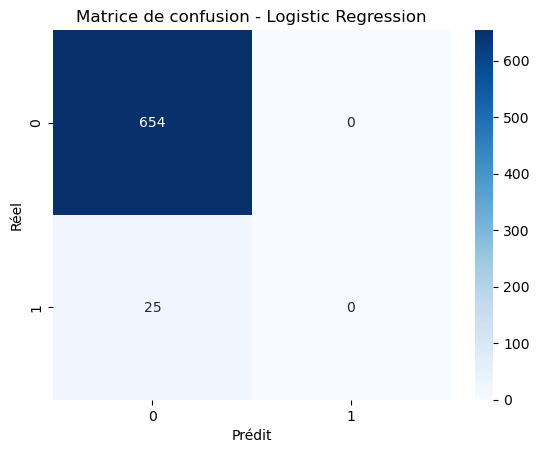


--- Decision Tree ---
Accuracy: 0.9425625920471281
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       654
           1       0.23      0.24      0.24        25

    accuracy                           0.94       679
   macro avg       0.60      0.60      0.60       679
weighted avg       0.94      0.94      0.94       679



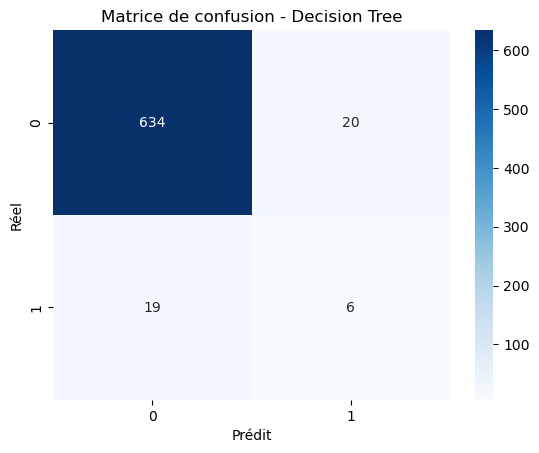

AttributeError: 'Flags' object has no attribute 'c_contiguous'

In [64]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier()
}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n--- {name} ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, cmap="Blues", fmt='d')
    plt.title(f'Matrice de confusion - {name}')
    plt.xlabel("Prédit")
    plt.ylabel("Réel")
    plt.show()


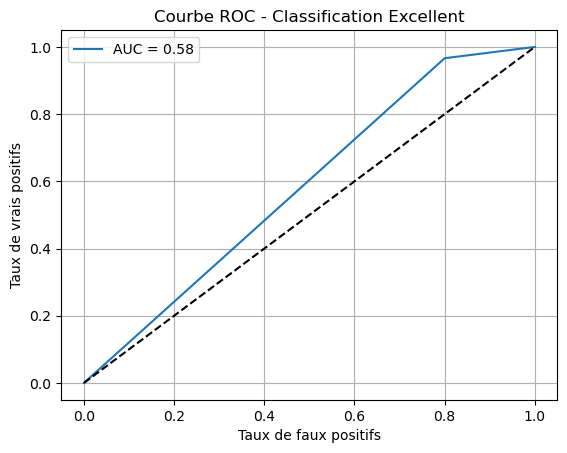

In [ ]:
#classification selon ra^pport qualité prix
df['classe_qp_bin'] = df['classe_qp'].apply(lambda x: 1 if x == 'Excellent' else 0)
y_bin = df['classe_qp_bin']
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.3, random_state=42)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("Taux de faux positifs")
plt.ylabel("Taux de vrais positifs")
plt.title("Courbe ROC - Classification Excellent")
plt.legend()
plt.grid(True)
plt.show()
